<h1 style="color: green">Corona Virus Predictions</h1>

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
# import tabloo

In [4]:
import numpy as np

In [5]:
from datetime import datetime, timedelta

<h1 style="color:blue"> Data Preprocessing</h1>

## Importing data

In [6]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


<div style="background: #ffa490; padding: 10px; border-radius: 3px;"><p style="font-size: 18px"><span style="color: green; font-size: 28px; font-weight: bold;">Note: </span>If you want to make analysis on whole data upto current date then don't run below cell. Below cell will filtered data upto date mentioned in research paper (10 July, 2020) related to this work.</p>

In [7]:
confirmed_cases = confirmed_cases.iloc[:,:175]
deaths = deaths.iloc[:,:175]
recovered = recovered.iloc[:,:175]

#### An Overview of dataframe filttered for Pakistan

In [8]:
recovered[recovered['Country/Region'] == 'Pakistan']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20
185,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,104694,113623,113623,125094,131649,134957,140965,145311,149092,153134


## Filtering data for Pakistan

In [9]:
confirmed_PK = confirmed_cases[confirmed_cases['Country/Region'] == 'Pakistan']
deaths_PK = deaths[deaths['Country/Region'] == 'Pakistan']
recovered_PK = recovered[recovered['Country/Region'] == 'Pakistan']

In [10]:
dates = np.array(confirmed_PK.iloc[0,38:].index)
dates = [datetime.strptime(date, '%m/%d/%y').date() for date in dates] 
dates = [x.strftime('%d/%m/%y') for x in dates]

In [11]:
confirmed_pk = np.array(confirmed_PK.iloc[0,38:])
deaths_pk = np.array(deaths_PK.iloc[0,38:])
recovered_pk = np.array(recovered_PK.iloc[0,38:])

In [12]:
conf_death_recov = np.concatenate((confirmed_pk.reshape(-1,1), deaths_pk.reshape(-1,1), recovered_pk.reshape(-1,1)), axis = 1)

In [13]:
print('The data taken from 25 feb 2020 because 1st two case was confirmed at that day. All the previous data is emitted.\n')
pd.DataFrame(np.append(np.array(dates).reshape(-1,1), conf_death_recov, axis = 1), 
             columns = ['Date', 'Confirmed Cases', 'Deaths', 'Recoveries'])

The data taken from 25 feb 2020 because 1st two case was confirmed at that day. All the previous data is emitted.



,Date,Confirmed Cases,Deaths,Recoveries
0,25/02/20,2,0,0
1,26/02/20,2,0,0
2,27/02/20,2,0,0
3,28/02/20,4,0,0
4,29/02/20,4,0,0
...,...,...,...,...
132,06/07/20,234509,4839,134957
133,07/07/20,237489,4922,140965
134,08/07/20,240848,4983,145311
135,09/07/20,243599,5058,149092


## Ploting Imported Data

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.pyplot import figure

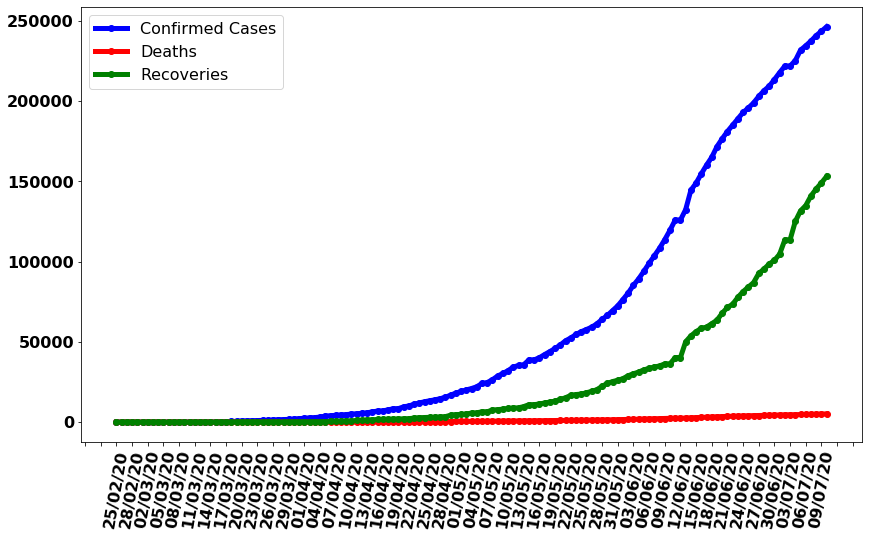

In [15]:
plt.figure(figsize=(14,8))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.plot(dates,confirmed_pk, 'bo-', linewidth = 5)
plt.plot(dates,deaths_pk, 'ro-', linewidth = 5)
plt.plot(dates,recovered_pk, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
# plt.title('Cases Recorded in Pakistan from ' + dates[0] + ' to ' + dates[-1])
plt.xticks(rotation=80, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

## Data Preprocessing

### Processing input data into polynomial form data

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly_reg = PolynomialFeatures(degree = 6)

#### This is data in only integer values with 1 column

In [18]:
input_data_simple = np.arange(0,len(confirmed_pk)) + 1

#### Data transformed into polynomial equation upto degree mentioned above

In [19]:
input_data = poly_reg.fit_transform(input_data_simple.reshape(-1,1))

### Prepairing Input and Dates into DataFrame

In [20]:
inputData_dates = pd.Series(dates, index = input_data_simple)

### Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scx = StandardScaler()
input_data_scaled = scx.fit_transform(input_data[:,1:])

### A Method to Generate Data for Future

### <p style="color: red; font-weight: bold;">Note: Make sure that Scaling Cells Runned prior than Future Data Method Cells

In [23]:

def generate_future_data(inp, days_to_get):
    prep_future_data_simple = (np.arange(0, days_to_get + 1) + inp[-1]).reshape(-1,1)
    generated_future_data = poly_reg.transform(prep_future_data_simple)
    scaled_gen_future_data = scx.transform(generated_future_data[:,1:])
    # Generating Dates
    lastDate = inputData_dates[inp[-1]]
    futureDates = [datetime.strptime(lastDate, '%d/%m/%y').date()]
    for i in range(days_to_get):
        futureDates.append(futureDates[-1] + timedelta(days=1))
    futureDates = [x.strftime('%d/%m/%y') for x in futureDates]
    
    return generated_future_data, scaled_gen_future_data, futureDates

### Calculating Average of Cases

In [24]:
averageConfirmedCases = confirmed_pk[-1]/len(confirmed_pk)
print('Average of Confirmed Cases: ', averageConfirmedCases)
averageDeaths = deaths_pk[-1]/len(deaths_pk)
print('Average of Deaths: ', averageDeaths)
averageRecoveries = recovered_pk[-1]/len(recovered_pk)
print('Average of Recoveries: ', averageRecoveries)

Average of Confirmed Cases:  1798.1824817518248
Average of Deaths:  37.394160583941606
Average of Recoveries:  1117.7664233576643


<h1 style="color: blue"> Creating Neural Network

<h4>Neural Nebtwork Design</h4>
<p>We designed a neural network with <b>one input layer, one hidden layer (with 200 neurons)</b> with <b>rectifying linear activation function</b> and <b>one output layer</b>.</p>

<h4>Optimization/Training</h4>
<p><b>Adam</b> optimizer is used to train ANN with learning rate of 1e-1 and 500 iterations are performed for training. The loss function is used as mean square error between predictions and observations.</p>

In [26]:
class annModel:
    def __init__(self, X_data, Y_data, hidden_neurons = 200, activation = 'relu', lear_rate = 1e-1):
        self.X_data = X_data
        self.Y_data = Y_data
        self.training = False
        input_samples, input_shape = self.X_data.shape
        try:
            output_samples, output_shape = self.Y_data.shape
        except:
            output_shape = 1
            
        self.annDesign = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.Dense(hidden_neurons, activation=activation),
            tf.keras.layers.Dense(output_shape),
        ])
        compiler = self.annDesign.compile(optimizer = tf.keras.optimizers.Adam(lear_rate), loss='mse', metrics=['MeanAbsoluteError'])
    def customize(self):
        return self.annDesign
    def summary(self):
        return self.annDesign.summary()
    def fit(self, epochs = 500):
        fitting = self.annDesign.fit(self.X_data, self.Y_data, epochs = epochs)
        self.training = True
        return fitting
    def predict(self, prediction_data):
        if self.training:
            predictions = self.annDesign.predict(prediction_data)
            return predictions
        else:
            print("Neural network model is not trained. Please use fit method to train model")

<h3 style="color: #9C27B0"> Predictions on All the Cases (Confirmed, Deaths, Recovories) with Designed ANN

<p>This section has been divided into following two subsections:</p>
<ul>
    <li>In first section, the data has splitted into train/test to evaluate the model and named as <b>ann_model_for_evaluation</b>. The purpose of this section is to evaluate the performance and accuracy of model with available data. For this purpose, training data is used to train and fit the model on data and then test data is used to check the efficiency and accuracy of model.</li>
    <li>In second section, once the model has evaluated, whole data is used to train the model and then some future input data is generated to predict the cases in future.</li>
</ul>

## 1 - Evaluating Model on Train Test Splitted Data

#### Splitting data into train-test sets

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
dates_train, dates_test = train_test_split(dates, test_size=0.05, shuffle=False)
input_train, input_test, output_train, output_test = train_test_split(input_data_scaled, conf_death_recov, 
                                                                                  test_size=0.05, shuffle=False)

#### Transforming into tensors of input-output data for ANN

In [29]:
input_train_tf = tf.convert_to_tensor(np.array(input_train), dtype=tf.float32)
input_test_tf = tf.convert_to_tensor(np.array(input_test), dtype=tf.float32)
output_train_tf = tf.convert_to_tensor(np.array(output_train), dtype=tf.float32)
output_test_tf = tf.convert_to_tensor(np.array(output_test), dtype=tf.float32)

#### Creating instance of proposed ANN model

In [30]:
ann_model_for_evaluation = annModel(input_train_tf, output_train_tf)

#### A model summary about layers shapes and number of paramaters/weights is given below

In [31]:
ann_model_for_evaluation.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


#### Selection of best epochs (during experiments) and training/fitting of proposed ANN model on training data

In [32]:
best_epochs = 4000

In [33]:
fitting_amfe = ann_model_for_evaluation.fit(best_epochs)

Train on 130 samples
Epoch 1/4000
130/130 [==============================] - 3s 22ms/sample - loss: 2792795214.7692 - MeanAbsoluteError: 23971.1309
Epoch 2/4000
130/130 [==============================] - 0s 146us/sample - loss: 2784134994.7077 - MeanAbsoluteError: 23906.9922
Epoch 3/4000
130/130 [==============================] - 0s 115us/sample - loss: 2766225998.7692 - MeanAbsoluteError: 23786.6543
Epoch 4/4000
130/130 [==============================] - 0s 115us/sample - loss: 2735947085.1692 - MeanAbsoluteError: 23571.3359
Epoch 5/4000
130/130 [==============================] - 0s 115us/sample - loss: 2688519990.8000 - MeanAbsoluteError: 23217.1582
Epoch 6/4000
130/130 [==============================] - 0s 123us/sample - loss: 2621245015.4462 - MeanAbsoluteError: 22830.1465
Epoch 7/4000
130/130 [==============================] - 0s 100us/sample - loss: 2527948468.6769 - MeanAbsoluteError: 22467.7109
Epoch 8/4000
130/130 [==============================] - 0s 138us/sample - loss: 2423

130/130 [==============================] - 0s 123us/sample - loss: 9950320.0721 - MeanAbsoluteError: 1628.3230
Epoch 66/4000
130/130 [==============================] - 0s 138us/sample - loss: 9849914.1077 - MeanAbsoluteError: 1615.9697
Epoch 67/4000
130/130 [==============================] - 0s 108us/sample - loss: 9863727.7231 - MeanAbsoluteError: 1612.8680
Epoch 68/4000
130/130 [==============================] - 0s 138us/sample - loss: 9867151.1942 - MeanAbsoluteError: 1614.5112
Epoch 69/4000
130/130 [==============================] - 0s 115us/sample - loss: 9922622.3038 - MeanAbsoluteError: 1606.0787
Epoch 70/4000
130/130 [==============================] - 0s 146us/sample - loss: 9906310.1385 - MeanAbsoluteError: 1611.8016
Epoch 71/4000
130/130 [==============================] - 0s 123us/sample - loss: 9872053.7538 - MeanAbsoluteError: 1605.1215
Epoch 72/4000
130/130 [==============================] - 0s 108us/sample - loss: 9757080.4538 - MeanAbsoluteError: 1598.8983
Epoch 73/4000


130/130 [==============================] - 0s 161us/sample - loss: 9280564.9298 - MeanAbsoluteError: 1512.8748
Epoch 130/4000
130/130 [==============================] - 0s 200us/sample - loss: 9381985.2000 - MeanAbsoluteError: 1524.0433
Epoch 131/4000
130/130 [==============================] - 0s 238us/sample - loss: 9185048.4068 - MeanAbsoluteError: 1505.6139
Epoch 132/4000
130/130 [==============================] - 0s 223us/sample - loss: 9222488.8596 - MeanAbsoluteError: 1494.7269
Epoch 133/4000
130/130 [==============================] - 0s 292us/sample - loss: 9284148.1846 - MeanAbsoluteError: 1493.3876
Epoch 134/4000
130/130 [==============================] - 0s 200us/sample - loss: 9490470.5103 - MeanAbsoluteError: 1508.4469
Epoch 135/4000
130/130 [==============================] - 0s 246us/sample - loss: 9516178.4000 - MeanAbsoluteError: 1512.5735
Epoch 136/4000
130/130 [==============================] - 0s 184us/sample - loss: 9289272.4462 - MeanAbsoluteError: 1504.0203
Epoch 1

130/130 [==============================] - 0s 108us/sample - loss: 8512957.1692 - MeanAbsoluteError: 1403.1399
Epoch 194/4000
130/130 [==============================] - 0s 100us/sample - loss: 8399862.1308 - MeanAbsoluteError: 1393.0090
Epoch 195/4000
130/130 [==============================] - 0s 123us/sample - loss: 8612561.1538 - MeanAbsoluteError: 1402.9332
Epoch 196/4000
130/130 [==============================] - 0s 115us/sample - loss: 8461470.9673 - MeanAbsoluteError: 1390.9030
Epoch 197/4000
130/130 [==============================] - 0s 184us/sample - loss: 8388017.3978 - MeanAbsoluteError: 1385.2838
Epoch 198/4000
130/130 [==============================] - 0s 123us/sample - loss: 8346677.3135 - MeanAbsoluteError: 1391.7657
Epoch 199/4000
130/130 [==============================] - 0s 100us/sample - loss: 8336178.5885 - MeanAbsoluteError: 1380.9109
Epoch 200/4000
130/130 [==============================] - 0s 131us/sample - loss: 8359126.3769 - MeanAbsoluteError: 1377.6060
Epoch 2

130/130 [==============================] - 0s 138us/sample - loss: 7781256.1538 - MeanAbsoluteError: 1297.3650
Epoch 259/4000
130/130 [==============================] - 0s 123us/sample - loss: 7662896.5385 - MeanAbsoluteError: 1298.7252
Epoch 260/4000
130/130 [==============================] - 0s 161us/sample - loss: 8072351.3346 - MeanAbsoluteError: 1343.3137
Epoch 261/4000
130/130 [==============================] - 0s 154us/sample - loss: 8467685.6649 - MeanAbsoluteError: 1354.4493
Epoch 262/4000
130/130 [==============================] - 0s 138us/sample - loss: 8040852.8125 - MeanAbsoluteError: 1318.2347
Epoch 263/4000
130/130 [==============================] - 0s 154us/sample - loss: 7785994.2077 - MeanAbsoluteError: 1294.6194
Epoch 264/4000
130/130 [==============================] - 0s 108us/sample - loss: 7843358.0308 - MeanAbsoluteError: 1285.3643
Epoch 265/4000
130/130 [==============================] - 0s 108us/sample - loss: 7721707.7875 - MeanAbsoluteError: 1277.5607
Epoch 2

130/130 [==============================] - 0s 100us/sample - loss: 7212225.9077 - MeanAbsoluteError: 1195.5856
Epoch 323/4000
130/130 [==============================] - 0s 115us/sample - loss: 7056079.1692 - MeanAbsoluteError: 1185.0092
Epoch 324/4000
130/130 [==============================] - 0s 138us/sample - loss: 7146664.1837 - MeanAbsoluteError: 1208.6035
Epoch 325/4000
130/130 [==============================] - 0s 108us/sample - loss: 7238023.6689 - MeanAbsoluteError: 1233.1051
Epoch 326/4000
130/130 [==============================] - 0s 108us/sample - loss: 7130318.8038 - MeanAbsoluteError: 1217.8086
Epoch 327/4000
130/130 [==============================] - 0s 108us/sample - loss: 7059206.6308 - MeanAbsoluteError: 1209.2780
Epoch 328/4000
130/130 [==============================] - 0s 123us/sample - loss: 7086126.9231 - MeanAbsoluteError: 1213.7184
Epoch 329/4000
130/130 [==============================] - 0s 154us/sample - loss: 7180383.2000 - MeanAbsoluteError: 1223.3286
Epoch 3

130/130 [==============================] - 0s 146us/sample - loss: 7976081.6698 - MeanAbsoluteError: 1268.3904
Epoch 387/4000
130/130 [==============================] - 0s 200us/sample - loss: 7202102.9332 - MeanAbsoluteError: 1244.6849
Epoch 388/4000
130/130 [==============================] - 0s 184us/sample - loss: 7329376.4048 - MeanAbsoluteError: 1214.5931
Epoch 389/4000
130/130 [==============================] - 0s 192us/sample - loss: 7101060.8096 - MeanAbsoluteError: 1229.9463
Epoch 390/4000
130/130 [==============================] - 0s 200us/sample - loss: 6848145.6298 - MeanAbsoluteError: 1184.9141
Epoch 391/4000
130/130 [==============================] - 0s 161us/sample - loss: 6526441.6558 - MeanAbsoluteError: 1127.2781
Epoch 392/4000
130/130 [==============================] - 0s 246us/sample - loss: 6568633.9692 - MeanAbsoluteError: 1120.1696
Epoch 393/4000
130/130 [==============================] - 0s 184us/sample - loss: 6759095.6885 - MeanAbsoluteError: 1135.0144
Epoch 3

130/130 [==============================] - 0s 131us/sample - loss: 6475981.7846 - MeanAbsoluteError: 1122.7285
Epoch 451/4000
130/130 [==============================] - 0s 108us/sample - loss: 6502066.2462 - MeanAbsoluteError: 1060.2474
Epoch 452/4000
130/130 [==============================] - 0s 131us/sample - loss: 8776906.4030 - MeanAbsoluteError: 1208.3361
Epoch 453/4000
130/130 [==============================] - 0s 100us/sample - loss: 7295791.6788 - MeanAbsoluteError: 1206.6550
Epoch 454/4000
130/130 [==============================] - 0s 108us/sample - loss: 6895800.5769 - MeanAbsoluteError: 1157.4387
Epoch 455/4000
130/130 [==============================] - 0s 123us/sample - loss: 6499580.5615 - MeanAbsoluteError: 1107.0771
Epoch 456/4000
130/130 [==============================] - 0s 108us/sample - loss: 6761637.4000 - MeanAbsoluteError: 1129.5436
Epoch 457/4000
130/130 [==============================] - 0s 131us/sample - loss: 6618364.8370 - MeanAbsoluteError: 1091.1362
Epoch 4

130/130 [==============================] - 0s 108us/sample - loss: 7195250.0490 - MeanAbsoluteError: 1099.6949
Epoch 515/4000
130/130 [==============================] - 0s 115us/sample - loss: 6323528.7269 - MeanAbsoluteError: 1027.6899
Epoch 516/4000
130/130 [==============================] - 0s 115us/sample - loss: 5963522.7506 - MeanAbsoluteError: 1018.4462
Epoch 517/4000
130/130 [==============================] - 0s 115us/sample - loss: 6119918.7654 - MeanAbsoluteError: 1043.0164
Epoch 518/4000
130/130 [==============================] - 0s 123us/sample - loss: 6010962.8344 - MeanAbsoluteError: 1023.6829
Epoch 519/4000
130/130 [==============================] - 0s 123us/sample - loss: 5919281.2923 - MeanAbsoluteError: 1033.7378
Epoch 520/4000
130/130 [==============================] - 0s 123us/sample - loss: 5621266.6369 - MeanAbsoluteError: 1002.2878
Epoch 521/4000
130/130 [==============================] - 0s 131us/sample - loss: 5799709.3538 - MeanAbsoluteError: 983.4797
Epoch 52

130/130 [==============================] - 0s 108us/sample - loss: 5649535.2615 - MeanAbsoluteError: 1025.4666
Epoch 579/4000
130/130 [==============================] - 0s 131us/sample - loss: 6149865.5077 - MeanAbsoluteError: 1079.5386
Epoch 580/4000
130/130 [==============================] - 0s 100us/sample - loss: 5635173.7712 - MeanAbsoluteError: 1012.9511
Epoch 581/4000
130/130 [==============================] - 0s 131us/sample - loss: 5462567.4615 - MeanAbsoluteError: 969.9016
Epoch 582/4000
130/130 [==============================] - 0s 108us/sample - loss: 5916684.4722 - MeanAbsoluteError: 1033.7640
Epoch 583/4000
130/130 [==============================] - 0s 123us/sample - loss: 5569726.6462 - MeanAbsoluteError: 984.9450
Epoch 584/4000
130/130 [==============================] - 0s 100us/sample - loss: 5438561.1423 - MeanAbsoluteError: 961.0935
Epoch 585/4000
130/130 [==============================] - 0s 115us/sample - loss: 5450529.2308 - MeanAbsoluteError: 972.2646
Epoch 586/4

130/130 [==============================] - 0s 161us/sample - loss: 5193126.5692 - MeanAbsoluteError: 934.5970
Epoch 644/4000
130/130 [==============================] - 0s 161us/sample - loss: 5301570.7692 - MeanAbsoluteError: 944.6496
Epoch 645/4000
130/130 [==============================] - 0s 115us/sample - loss: 6813291.9308 - MeanAbsoluteError: 1104.1831
Epoch 646/4000
130/130 [==============================] - 0s 184us/sample - loss: 9412369.3875 - MeanAbsoluteError: 1236.6665
Epoch 647/4000
130/130 [==============================] - 0s 161us/sample - loss: 6370230.8581 - MeanAbsoluteError: 1121.4437
Epoch 648/4000
130/130 [==============================] - 0s 146us/sample - loss: 6876924.8308 - MeanAbsoluteError: 1200.2362
Epoch 649/4000
130/130 [==============================] - 0s 154us/sample - loss: 5639781.1231 - MeanAbsoluteError: 1057.0105
Epoch 650/4000
130/130 [==============================] - 0s 154us/sample - loss: 6161203.6731 - MeanAbsoluteError: 1173.7428
Epoch 651

Epoch 708/4000
130/130 [==============================] - 0s 108us/sample - loss: 12427856.4575 - MeanAbsoluteError: 1332.2190
Epoch 709/4000
130/130 [==============================] - 0s 115us/sample - loss: 7314878.1808 - MeanAbsoluteError: 1011.6506
Epoch 710/4000
130/130 [==============================] - 0s 115us/sample - loss: 5695651.5129 - MeanAbsoluteError: 1060.3043
Epoch 711/4000
130/130 [==============================] - 0s 115us/sample - loss: 6223445.1385 - MeanAbsoluteError: 1077.3098
Epoch 712/4000
130/130 [==============================] - 0s 100us/sample - loss: 5621067.3846 - MeanAbsoluteError: 1026.4015
Epoch 713/4000
130/130 [==============================] - 0s 138us/sample - loss: 6103739.8462 - MeanAbsoluteError: 1002.0397
Epoch 714/4000
130/130 [==============================] - 0s 138us/sample - loss: 6624749.5305 - MeanAbsoluteError: 982.4489
Epoch 715/4000
130/130 [==============================] - 0s 123us/sample - loss: 5743166.0769 - MeanAbsoluteError: 10

130/130 [==============================] - 0s 146us/sample - loss: 5315651.1077 - MeanAbsoluteError: 952.9183
Epoch 773/4000
130/130 [==============================] - 0s 115us/sample - loss: 4595094.1692 - MeanAbsoluteError: 906.7779
Epoch 774/4000
130/130 [==============================] - 0s 123us/sample - loss: 5200016.5851 - MeanAbsoluteError: 924.0294
Epoch 775/4000
130/130 [==============================] - 0s 108us/sample - loss: 6694559.4721 - MeanAbsoluteError: 951.7772
Epoch 776/4000
130/130 [==============================] - 0s 131us/sample - loss: 5100443.4846 - MeanAbsoluteError: 900.9266
Epoch 777/4000
130/130 [==============================] - 0s 123us/sample - loss: 4673464.6423 - MeanAbsoluteError: 901.0984
Epoch 778/4000
130/130 [==============================] - 0s 123us/sample - loss: 4571417.4615 - MeanAbsoluteError: 890.9350
Epoch 779/4000
130/130 [==============================] - 0s 123us/sample - loss: 4890873.1174 - MeanAbsoluteError: 935.2734
Epoch 780/4000


130/130 [==============================] - 0s 154us/sample - loss: 4826244.1532 - MeanAbsoluteError: 854.2762
Epoch 838/4000
130/130 [==============================] - 0s 108us/sample - loss: 4416482.9846 - MeanAbsoluteError: 864.6616
Epoch 839/4000
130/130 [==============================] - 0s 131us/sample - loss: 5111134.0865 - MeanAbsoluteError: 940.4781
Epoch 840/4000
130/130 [==============================] - 0s 123us/sample - loss: 5169179.6615 - MeanAbsoluteError: 933.8104
Epoch 841/4000
130/130 [==============================] - 0s 131us/sample - loss: 5119185.0077 - MeanAbsoluteError: 983.7743
Epoch 842/4000
130/130 [==============================] - 0s 115us/sample - loss: 5413042.8995 - MeanAbsoluteError: 952.2354
Epoch 843/4000
130/130 [==============================] - 0s 138us/sample - loss: 4354482.1399 - MeanAbsoluteError: 838.4768
Epoch 844/4000
130/130 [==============================] - 0s 115us/sample - loss: 4637696.3510 - MeanAbsoluteError: 919.5342
Epoch 845/4000


130/130 [==============================] - 0s 138us/sample - loss: 3823946.9475 - MeanAbsoluteError: 808.9345
Epoch 903/4000
130/130 [==============================] - 0s 169us/sample - loss: 4287187.9368 - MeanAbsoluteError: 860.3519
Epoch 904/4000
130/130 [==============================] - 0s 146us/sample - loss: 3942529.1077 - MeanAbsoluteError: 811.8680
Epoch 905/4000
130/130 [==============================] - 0s 146us/sample - loss: 4463490.2462 - MeanAbsoluteError: 820.8421
Epoch 906/4000
130/130 [==============================] - 0s 277us/sample - loss: 4707532.4846 - MeanAbsoluteError: 819.0473
Epoch 907/4000
130/130 [==============================] - 0s 254us/sample - loss: 3931223.2334 - MeanAbsoluteError: 800.9496
Epoch 908/4000
130/130 [==============================] - 0s 131us/sample - loss: 4366694.0353 - MeanAbsoluteError: 865.0203
Epoch 909/4000
130/130 [==============================] - 0s 146us/sample - loss: 4028570.1192 - MeanAbsoluteError: 823.3294
Epoch 910/4000


130/130 [==============================] - 0s 161us/sample - loss: 3968378.0695 - MeanAbsoluteError: 939.3744
Epoch 968/4000
130/130 [==============================] - 0s 108us/sample - loss: 3951938.2325 - MeanAbsoluteError: 921.1826
Epoch 969/4000
130/130 [==============================] - 0s 115us/sample - loss: 3773584.8663 - MeanAbsoluteError: 918.8179
Epoch 970/4000
130/130 [==============================] - 0s 108us/sample - loss: 3876509.3304 - MeanAbsoluteError: 922.1935
Epoch 971/4000
130/130 [==============================] - 0s 115us/sample - loss: 3780490.4385 - MeanAbsoluteError: 896.2245
Epoch 972/4000
130/130 [==============================] - 0s 123us/sample - loss: 4262642.4601 - MeanAbsoluteError: 927.9042
Epoch 973/4000
130/130 [==============================] - 0s 100us/sample - loss: 4462196.2769 - MeanAbsoluteError: 898.7371
Epoch 974/4000
130/130 [==============================] - 0s 115us/sample - loss: 3663590.9096 - MeanAbsoluteError: 834.6301
Epoch 975/4000


130/130 [==============================] - 0s 115us/sample - loss: 3382178.4445 - MeanAbsoluteError: 764.1969
Epoch 1032/4000
130/130 [==============================] - 0s 108us/sample - loss: 3558624.8266 - MeanAbsoluteError: 790.2408
Epoch 1033/4000
130/130 [==============================] - 0s 115us/sample - loss: 3356735.7231 - MeanAbsoluteError: 765.5303
Epoch 1034/4000
130/130 [==============================] - 0s 108us/sample - loss: 3582603.6923 - MeanAbsoluteError: 791.6782
Epoch 1035/4000
130/130 [==============================] - 0s 115us/sample - loss: 4064239.4338 - MeanAbsoluteError: 824.0168
Epoch 1036/4000
130/130 [==============================] - 0s 138us/sample - loss: 3410549.3802 - MeanAbsoluteError: 780.4246
Epoch 1037/4000
130/130 [==============================] - 0s 138us/sample - loss: 3455040.1969 - MeanAbsoluteError: 752.9203
Epoch 1038/4000
130/130 [==============================] - 0s 169us/sample - loss: 3416344.1731 - MeanAbsoluteError: 748.6876
Epoch 10

130/130 [==============================] - 0s 161us/sample - loss: 3101311.7500 - MeanAbsoluteError: 730.0939
Epoch 1095/4000
130/130 [==============================] - 0s 138us/sample - loss: 3152991.6157 - MeanAbsoluteError: 730.1934
Epoch 1096/4000
130/130 [==============================] - 0s 123us/sample - loss: 3116546.5309 - MeanAbsoluteError: 723.6191
Epoch 1097/4000
130/130 [==============================] - 0s 131us/sample - loss: 3195238.6736 - MeanAbsoluteError: 740.1819
Epoch 1098/4000
130/130 [==============================] - 0s 131us/sample - loss: 3112726.2135 - MeanAbsoluteError: 735.9106
Epoch 1099/4000
130/130 [==============================] - 0s 146us/sample - loss: 3167062.5077 - MeanAbsoluteError: 738.2480
Epoch 1100/4000
130/130 [==============================] - 0s 115us/sample - loss: 3160940.5346 - MeanAbsoluteError: 742.1712
Epoch 1101/4000
130/130 [==============================] - 0s 131us/sample - loss: 3288770.2760 - MeanAbsoluteError: 759.1382
Epoch 11

130/130 [==============================] - 0s 146us/sample - loss: 2895995.3894 - MeanAbsoluteError: 715.5215
Epoch 1160/4000
130/130 [==============================] - 0s 131us/sample - loss: 2898594.1769 - MeanAbsoluteError: 714.1188
Epoch 1161/4000
130/130 [==============================] - 0s 131us/sample - loss: 2831972.2764 - MeanAbsoluteError: 711.3101
Epoch 1162/4000
130/130 [==============================] - 0s 123us/sample - loss: 2853389.2231 - MeanAbsoluteError: 699.4154
Epoch 1163/4000
130/130 [==============================] - 0s 123us/sample - loss: 3330645.1077 - MeanAbsoluteError: 748.7520
Epoch 1164/4000
130/130 [==============================] - 0s 123us/sample - loss: 3341472.6191 - MeanAbsoluteError: 755.6870
Epoch 1165/4000
130/130 [==============================] - 0s 123us/sample - loss: 3071303.4055 - MeanAbsoluteError: 748.3292
Epoch 1166/4000
130/130 [==============================] - 0s 123us/sample - loss: 3072174.7692 - MeanAbsoluteError: 734.9869
Epoch 11

130/130 [==============================] - 0s 169us/sample - loss: 2734050.1820 - MeanAbsoluteError: 704.8887
Epoch 1224/4000
130/130 [==============================] - 0s 223us/sample - loss: 2674798.6499 - MeanAbsoluteError: 701.8600
Epoch 1225/4000
130/130 [==============================] - 0s 177us/sample - loss: 3067914.3385 - MeanAbsoluteError: 759.8386
Epoch 1226/4000
130/130 [==============================] - 0s 223us/sample - loss: 3227610.8856 - MeanAbsoluteError: 731.8749
Epoch 1227/4000
130/130 [==============================] - 0s 277us/sample - loss: 4025169.4267 - MeanAbsoluteError: 762.7842
Epoch 1228/4000
130/130 [==============================] - 0s 384us/sample - loss: 2646817.6962 - MeanAbsoluteError: 677.8056
Epoch 1229/4000
130/130 [==============================] - 0s 246us/sample - loss: 2809474.6808 - MeanAbsoluteError: 711.3763
Epoch 1230/4000
130/130 [==============================] - 0s 161us/sample - loss: 3008172.1936 - MeanAbsoluteError: 730.0659
Epoch 12

130/130 [==============================] - 0s 115us/sample - loss: 2742958.8115 - MeanAbsoluteError: 719.2064
Epoch 1288/4000
130/130 [==============================] - 0s 115us/sample - loss: 2358704.0615 - MeanAbsoluteError: 669.9880
Epoch 1289/4000
130/130 [==============================] - 0s 108us/sample - loss: 2396044.9769 - MeanAbsoluteError: 670.1490
Epoch 1290/4000
130/130 [==============================] - 0s 146us/sample - loss: 3186643.8835 - MeanAbsoluteError: 764.0949
Epoch 1291/4000
130/130 [==============================] - 0s 123us/sample - loss: 2346629.7077 - MeanAbsoluteError: 678.2357
Epoch 1292/4000
130/130 [==============================] - 0s 146us/sample - loss: 2676271.3365 - MeanAbsoluteError: 642.8120
Epoch 1293/4000
130/130 [==============================] - 0s 123us/sample - loss: 2702671.9249 - MeanAbsoluteError: 665.7728
Epoch 1294/4000
130/130 [==============================] - 0s 154us/sample - loss: 2458001.7962 - MeanAbsoluteError: 670.1470
Epoch 12

130/130 [==============================] - 0s 115us/sample - loss: 2385825.6000 - MeanAbsoluteError: 639.3812
Epoch 1352/4000
130/130 [==============================] - 0s 108us/sample - loss: 3055353.5615 - MeanAbsoluteError: 769.0684
Epoch 1353/4000
130/130 [==============================] - 0s 108us/sample - loss: 3062941.5810 - MeanAbsoluteError: 757.1357
Epoch 1354/4000
130/130 [==============================] - 0s 123us/sample - loss: 2234517.8923 - MeanAbsoluteError: 629.2593
Epoch 1355/4000
130/130 [==============================] - 0s 161us/sample - loss: 2643452.6303 - MeanAbsoluteError: 698.4551
Epoch 1356/4000
130/130 [==============================] - 0s 115us/sample - loss: 3137361.1924 - MeanAbsoluteError: 783.2817
Epoch 1357/4000
130/130 [==============================] - 0s 146us/sample - loss: 2386896.3762 - MeanAbsoluteError: 691.7181
Epoch 1358/4000
130/130 [==============================] - 0s 108us/sample - loss: 2168290.3571 - MeanAbsoluteError: 655.2861
Epoch 13

130/130 [==============================] - 0s 146us/sample - loss: 2643599.3916 - MeanAbsoluteError: 657.1560
Epoch 1417/4000
130/130 [==============================] - 0s 146us/sample - loss: 2258384.1629 - MeanAbsoluteError: 656.0538
Epoch 1418/4000
130/130 [==============================] - 0s 131us/sample - loss: 1961882.7865 - MeanAbsoluteError: 596.8075
Epoch 1419/4000
130/130 [==============================] - 0s 115us/sample - loss: 1907923.0649 - MeanAbsoluteError: 607.3077
Epoch 1420/4000
130/130 [==============================] - 0s 146us/sample - loss: 2013070.3250 - MeanAbsoluteError: 632.6543
Epoch 1421/4000
130/130 [==============================] - 0s 169us/sample - loss: 1970741.3510 - MeanAbsoluteError: 582.9376
Epoch 1422/4000
130/130 [==============================] - 0s 154us/sample - loss: 2126272.4231 - MeanAbsoluteError: 584.3451
Epoch 1423/4000
130/130 [==============================] - 0s 138us/sample - loss: 1867337.3490 - MeanAbsoluteError: 575.1368
Epoch 14

130/130 [==============================] - 0s 123us/sample - loss: 1721204.5773 - MeanAbsoluteError: 557.1100
Epoch 1482/4000
130/130 [==============================] - 0s 177us/sample - loss: 1736387.3000 - MeanAbsoluteError: 554.7641
Epoch 1483/4000
130/130 [==============================] - 0s 154us/sample - loss: 1735087.2769 - MeanAbsoluteError: 568.6436
Epoch 1484/4000
130/130 [==============================] - 0s 215us/sample - loss: 1822087.8700 - MeanAbsoluteError: 580.8241
Epoch 1485/4000
130/130 [==============================] - 0s 323us/sample - loss: 2359040.3914 - MeanAbsoluteError: 634.6131
Epoch 1486/4000
130/130 [==============================] - 0s 261us/sample - loss: 1768717.4118 - MeanAbsoluteError: 573.3006
Epoch 1487/4000
130/130 [==============================] - 0s 184us/sample - loss: 1994338.3163 - MeanAbsoluteError: 618.3115
Epoch 1488/4000
130/130 [==============================] - 0s 208us/sample - loss: 1830532.6404 - MeanAbsoluteError: 569.4948
Epoch 14

130/130 [==============================] - 0s 184us/sample - loss: 1890559.5207 - MeanAbsoluteError: 563.1297
Epoch 1546/4000
130/130 [==============================] - ETA: 0s - loss: 2079552.3750 - MeanAbsoluteError: 504.451 - 0s 169us/sample - loss: 1927794.9538 - MeanAbsoluteError: 556.7072
Epoch 1547/4000
130/130 [==============================] - 0s 138us/sample - loss: 2595877.0659 - MeanAbsoluteError: 674.9866
Epoch 1548/4000
130/130 [==============================] - 0s 146us/sample - loss: 2580823.6895 - MeanAbsoluteError: 656.9753
Epoch 1549/4000
130/130 [==============================] - 0s 138us/sample - loss: 2165851.1050 - MeanAbsoluteError: 631.3887
Epoch 1550/4000
130/130 [==============================] - 0s 123us/sample - loss: 1663346.8231 - MeanAbsoluteError: 535.9728
Epoch 1551/4000
130/130 [==============================] - 0s 146us/sample - loss: 1616127.3181 - MeanAbsoluteError: 586.7432
Epoch 1552/4000
130/130 [==============================] - 0s 138us/sample

130/130 [==============================] - 0s 146us/sample - loss: 2874584.8308 - MeanAbsoluteError: 708.5488
Epoch 1610/4000
130/130 [==============================] - 0s 154us/sample - loss: 2907218.7154 - MeanAbsoluteError: 728.6652
Epoch 1611/4000
130/130 [==============================] - 0s 138us/sample - loss: 2037879.5083 - MeanAbsoluteError: 643.3812
Epoch 1612/4000
130/130 [==============================] - 0s 161us/sample - loss: 1469159.3750 - MeanAbsoluteError: 545.6283
Epoch 1613/4000
130/130 [==============================] - 0s 207us/sample - loss: 1660388.6561 - MeanAbsoluteError: 560.0038
Epoch 1614/4000
130/130 [==============================] - 0s 115us/sample - loss: 1505396.6227 - MeanAbsoluteError: 527.0453
Epoch 1615/4000
130/130 [==============================] - 0s 138us/sample - loss: 1371737.7692 - MeanAbsoluteError: 514.7231
Epoch 1616/4000
130/130 [==============================] - ETA: 0s - loss: 2007038.5000 - MeanAbsoluteError: 610.470 - 0s 154us/sample

130/130 [==============================] - 0s 146us/sample - loss: 1484467.8696 - MeanAbsoluteError: 515.5778
Epoch 1674/4000
130/130 [==============================] - 0s 115us/sample - loss: 1504843.1808 - MeanAbsoluteError: 557.8247
Epoch 1675/4000
130/130 [==============================] - 0s 108us/sample - loss: 1745046.7635 - MeanAbsoluteError: 543.0003
Epoch 1676/4000
130/130 [==============================] - 0s 146us/sample - loss: 1827847.1007 - MeanAbsoluteError: 547.4343
Epoch 1677/4000
130/130 [==============================] - 0s 108us/sample - loss: 1418412.6982 - MeanAbsoluteError: 531.9416
Epoch 1678/4000
130/130 [==============================] - 0s 154us/sample - loss: 1435968.3952 - MeanAbsoluteError: 543.5103
Epoch 1679/4000
130/130 [==============================] - 0s 123us/sample - loss: 1367646.9675 - MeanAbsoluteError: 497.5063
Epoch 1680/4000
130/130 [==============================] - 0s 138us/sample - loss: 1402422.0875 - MeanAbsoluteError: 490.8004
Epoch 16

130/130 [==============================] - 0s 108us/sample - loss: 1184008.0885 - MeanAbsoluteError: 472.7648
Epoch 1738/4000
130/130 [==============================] - 0s 123us/sample - loss: 1363906.6503 - MeanAbsoluteError: 551.7551
Epoch 1739/4000
130/130 [==============================] - 0s 115us/sample - loss: 1355439.8038 - MeanAbsoluteError: 572.8688
Epoch 1740/4000
130/130 [==============================] - 0s 131us/sample - loss: 1870632.2462 - MeanAbsoluteError: 584.8157
Epoch 1741/4000
130/130 [==============================] - 0s 138us/sample - loss: 2783079.7385 - MeanAbsoluteError: 713.6996
Epoch 1742/4000
130/130 [==============================] - 0s 115us/sample - loss: 2756586.5139 - MeanAbsoluteError: 716.3979
Epoch 1743/4000
130/130 [==============================] - 0s 138us/sample - loss: 2187733.2226 - MeanAbsoluteError: 611.3699
Epoch 1744/4000
130/130 [==============================] - 0s 154us/sample - loss: 1987065.1967 - MeanAbsoluteError: 585.4469
Epoch 17

Epoch 1802/4000
130/130 [==============================] - 0s 138us/sample - loss: 1730847.6942 - MeanAbsoluteError: 533.6373
Epoch 1803/4000
130/130 [==============================] - 0s 108us/sample - loss: 1598112.3231 - MeanAbsoluteError: 552.6912
Epoch 1804/4000
130/130 [==============================] - 0s 146us/sample - loss: 1115959.8115 - MeanAbsoluteError: 466.9883
Epoch 1805/4000
130/130 [==============================] - 0s 146us/sample - loss: 1103442.8968 - MeanAbsoluteError: 447.8206
Epoch 1806/4000
130/130 [==============================] - 0s 108us/sample - loss: 1174813.6769 - MeanAbsoluteError: 463.0881
Epoch 1807/4000
130/130 [==============================] - 0s 146us/sample - loss: 1107317.0620 - MeanAbsoluteError: 453.1417
Epoch 1808/4000
130/130 [==============================] - ETA: 0s - loss: 818029.5000 - MeanAbsoluteError: 421.92 - 0s 200us/sample - loss: 1166332.4282 - MeanAbsoluteError: 457.3311
Epoch 1809/4000
130/130 [==============================] - 0

130/130 [==============================] - 0s 115us/sample - loss: 1180873.2293 - MeanAbsoluteError: 450.3617
Epoch 1867/4000
130/130 [==============================] - 0s 123us/sample - loss: 1951557.5442 - MeanAbsoluteError: 568.6050
Epoch 1868/4000
130/130 [==============================] - 0s 131us/sample - loss: 1492413.2154 - MeanAbsoluteError: 483.6334
Epoch 1869/4000
130/130 [==============================] - 0s 123us/sample - loss: 2613126.8885 - MeanAbsoluteError: 630.4991
Epoch 1870/4000
130/130 [==============================] - 0s 108us/sample - loss: 2619439.0356 - MeanAbsoluteError: 624.5251
Epoch 1871/4000
130/130 [==============================] - 0s 115us/sample - loss: 2419883.8299 - MeanAbsoluteError: 610.6589
Epoch 1872/4000
130/130 [==============================] - 0s 138us/sample - loss: 1410429.9243 - MeanAbsoluteError: 483.8665
Epoch 1873/4000
130/130 [==============================] - 0s 146us/sample - loss: 1530386.3648 - MeanAbsoluteError: 527.5211
Epoch 18

130/130 [==============================] - 0s 108us/sample - loss: 2983378.1969 - MeanAbsoluteError: 666.1790
Epoch 1931/4000
130/130 [==============================] - 0s 131us/sample - loss: 4211593.4217 - MeanAbsoluteError: 773.6334
Epoch 1932/4000
130/130 [==============================] - 0s 123us/sample - loss: 2753696.1538 - MeanAbsoluteError: 729.6518
Epoch 1933/4000
130/130 [==============================] - 0s 100us/sample - loss: 3192468.4599 - MeanAbsoluteError: 704.3447
Epoch 1934/4000
130/130 [==============================] - 0s 123us/sample - loss: 4472137.1231 - MeanAbsoluteError: 838.2122
Epoch 1935/4000
130/130 [==============================] - 0s 100us/sample - loss: 1710618.0673 - MeanAbsoluteError: 562.1454
Epoch 1936/4000
130/130 [==============================] - 0s 131us/sample - loss: 1910655.0462 - MeanAbsoluteError: 604.5371
Epoch 1937/4000
130/130 [==============================] - 0s 223us/sample - loss: 1090975.2731 - MeanAbsoluteError: 463.0117
Epoch 19

130/130 [==============================] - 0s 123us/sample - loss: 1445977.8442 - MeanAbsoluteError: 517.9204
Epoch 1996/4000
130/130 [==============================] - ETA: 0s - loss: 1347560.8750 - MeanAbsoluteError: 546.973 - 0s 131us/sample - loss: 1800115.8692 - MeanAbsoluteError: 578.2557
Epoch 1997/4000
130/130 [==============================] - 0s 138us/sample - loss: 1665702.1769 - MeanAbsoluteError: 535.4841
Epoch 1998/4000
130/130 [==============================] - 0s 123us/sample - loss: 1112186.2670 - MeanAbsoluteError: 446.8438
Epoch 1999/4000
130/130 [==============================] - 0s 138us/sample - loss: 1604265.5558 - MeanAbsoluteError: 509.3540
Epoch 2000/4000
130/130 [==============================] - 0s 138us/sample - loss: 1186601.1192 - MeanAbsoluteError: 462.7593
Epoch 2001/4000
130/130 [==============================] - 0s 138us/sample - loss: 1111726.3106 - MeanAbsoluteError: 432.4268
Epoch 2002/4000
130/130 [==============================] - 0s 146us/sample

130/130 [==============================] - 0s 154us/sample - loss: 909101.7462 - MeanAbsoluteError: 413.0831
Epoch 2060/4000
130/130 [==============================] - 0s 138us/sample - loss: 1109305.4957 - MeanAbsoluteError: 475.7650
Epoch 2061/4000
130/130 [==============================] - 0s 108us/sample - loss: 1357905.0599 - MeanAbsoluteError: 501.7048
Epoch 2062/4000
130/130 [==============================] - 0s 161us/sample - loss: 946189.7712 - MeanAbsoluteError: 428.6160
Epoch 2063/4000
130/130 [==============================] - 0s 123us/sample - loss: 931428.6000 - MeanAbsoluteError: 423.3576
Epoch 2064/4000
130/130 [==============================] - 0s 154us/sample - loss: 1595813.0942 - MeanAbsoluteError: 486.9665
Epoch 2065/4000
130/130 [==============================] - 0s 138us/sample - loss: 1124711.6615 - MeanAbsoluteError: 420.6807
Epoch 2066/4000
130/130 [==============================] - 0s 154us/sample - loss: 1168632.7540 - MeanAbsoluteError: 440.0757
Epoch 2067/

130/130 [==============================] - 0s 115us/sample - loss: 834435.3981 - MeanAbsoluteError: 391.2441
Epoch 2125/4000
130/130 [==============================] - 0s 131us/sample - loss: 1109164.3063 - MeanAbsoluteError: 434.5340
Epoch 2126/4000
130/130 [==============================] - 0s 123us/sample - loss: 1019168.5106 - MeanAbsoluteError: 421.9546
Epoch 2127/4000
130/130 [==============================] - 0s 138us/sample - loss: 931559.0923 - MeanAbsoluteError: 397.3519
Epoch 2128/4000
130/130 [==============================] - 0s 123us/sample - loss: 817189.0279 - MeanAbsoluteError: 380.5136
Epoch 2129/4000
130/130 [==============================] - 0s 131us/sample - loss: 1029434.8566 - MeanAbsoluteError: 414.5178
Epoch 2130/4000
130/130 [==============================] - 0s 169us/sample - loss: 894818.9779 - MeanAbsoluteError: 391.2728
Epoch 2131/4000
130/130 [==============================] - 0s 138us/sample - loss: 807193.2851 - MeanAbsoluteError: 381.7907
Epoch 2132/40

Epoch 2189/4000
130/130 [==============================] - 0s 123us/sample - loss: 861666.1758 - MeanAbsoluteError: 392.4628
Epoch 2190/4000
130/130 [==============================] - 0s 108us/sample - loss: 803025.2537 - MeanAbsoluteError: 387.6620
Epoch 2191/4000
130/130 [==============================] - 0s 115us/sample - loss: 792761.5381 - MeanAbsoluteError: 383.1911
Epoch 2192/4000
130/130 [==============================] - 0s 138us/sample - loss: 826731.8692 - MeanAbsoluteError: 392.4828
Epoch 2193/4000
130/130 [==============================] - 0s 131us/sample - loss: 798286.7395 - MeanAbsoluteError: 385.5916
Epoch 2194/4000
130/130 [==============================] - 0s 146us/sample - loss: 837320.0542 - MeanAbsoluteError: 387.7289
Epoch 2195/4000
130/130 [==============================] - 0s 115us/sample - loss: 765856.1732 - MeanAbsoluteError: 376.5146
Epoch 2196/4000
130/130 [==============================] - 0s 131us/sample - loss: 790698.9118 - MeanAbsoluteError: 374.2314


Epoch 2254/4000
130/130 [==============================] - 0s 108us/sample - loss: 900035.4272 - MeanAbsoluteError: 437.3895
Epoch 2255/4000
130/130 [==============================] - 0s 146us/sample - loss: 880199.0304 - MeanAbsoluteError: 421.5335
Epoch 2256/4000
130/130 [==============================] - 0s 115us/sample - loss: 791253.5038 - MeanAbsoluteError: 374.4777
Epoch 2257/4000
130/130 [==============================] - 0s 131us/sample - loss: 1114081.2578 - MeanAbsoluteError: 436.4282
Epoch 2258/4000
130/130 [==============================] - 0s 154us/sample - loss: 828130.7865 - MeanAbsoluteError: 398.9606
Epoch 2259/4000
130/130 [==============================] - 0s 177us/sample - loss: 803736.4825 - MeanAbsoluteError: 397.3291
Epoch 2260/4000
130/130 [==============================] - 0s 131us/sample - loss: 834791.1353 - MeanAbsoluteError: 401.9995
Epoch 2261/4000
130/130 [==============================] - 0s 131us/sample - loss: 778382.5385 - MeanAbsoluteError: 364.8503

Epoch 2319/4000
130/130 [==============================] - 0s 123us/sample - loss: 913959.8557 - MeanAbsoluteError: 408.7447
Epoch 2320/4000
130/130 [==============================] - 0s 146us/sample - loss: 1040193.8577 - MeanAbsoluteError: 426.1214
Epoch 2321/4000
130/130 [==============================] - 0s 138us/sample - loss: 1253010.4975 - MeanAbsoluteError: 468.1957
Epoch 2322/4000
130/130 [==============================] - 0s 154us/sample - loss: 1103598.4951 - MeanAbsoluteError: 457.4366
Epoch 2323/4000
130/130 [==============================] - 0s 131us/sample - loss: 933135.2252 - MeanAbsoluteError: 405.9805
Epoch 2324/4000
130/130 [==============================] - 0s 115us/sample - loss: 808687.0242 - MeanAbsoluteError: 386.9972
Epoch 2325/4000
130/130 [==============================] - 0s 161us/sample - loss: 851100.6982 - MeanAbsoluteError: 396.9293
Epoch 2326/4000
130/130 [==============================] - 0s 146us/sample - loss: 746532.2231 - MeanAbsoluteError: 381.54

130/130 [==============================] - 0s 108us/sample - loss: 967464.5849 - MeanAbsoluteError: 386.6895
Epoch 2385/4000
130/130 [==============================] - 0s 115us/sample - loss: 747013.8004 - MeanAbsoluteError: 355.1808
Epoch 2386/4000
130/130 [==============================] - 0s 123us/sample - loss: 730938.6192 - MeanAbsoluteError: 361.2381
Epoch 2387/4000
130/130 [==============================] - 0s 108us/sample - loss: 1985527.0423 - MeanAbsoluteError: 526.9899
Epoch 2388/4000
130/130 [==============================] - 0s 115us/sample - loss: 1224669.8846 - MeanAbsoluteError: 461.2451
Epoch 2389/4000
130/130 [==============================] - 0s 108us/sample - loss: 1515086.9428 - MeanAbsoluteError: 513.1655
Epoch 2390/4000
130/130 [==============================] - 0s 131us/sample - loss: 1129361.4093 - MeanAbsoluteError: 430.3515
Epoch 2391/4000
130/130 [==============================] - 0s 131us/sample - loss: 865730.5404 - MeanAbsoluteError: 382.4034
Epoch 2392/4

130/130 [==============================] - 0s 115us/sample - loss: 1699594.5300 - MeanAbsoluteError: 543.5209
Epoch 2450/4000
130/130 [==============================] - 0s 123us/sample - loss: 1058829.1154 - MeanAbsoluteError: 432.4461
Epoch 2451/4000
130/130 [==============================] - 0s 123us/sample - loss: 1832695.8643 - MeanAbsoluteError: 552.6233
Epoch 2452/4000
130/130 [==============================] - 0s 108us/sample - loss: 1197765.6154 - MeanAbsoluteError: 484.4745
Epoch 2453/4000
130/130 [==============================] - 0s 131us/sample - loss: 1385708.2538 - MeanAbsoluteError: 484.9379
Epoch 2454/4000
130/130 [==============================] - 0s 146us/sample - loss: 1590822.4019 - MeanAbsoluteError: 522.6658
Epoch 2455/4000
130/130 [==============================] - 0s 123us/sample - loss: 1789798.9832 - MeanAbsoluteError: 556.6729
Epoch 2456/4000
130/130 [==============================] - 0s 138us/sample - loss: 1101077.3209 - MeanAbsoluteError: 467.7385
Epoch 24

130/130 [==============================] - 0s 146us/sample - loss: 814699.1192 - MeanAbsoluteError: 390.5462
Epoch 2515/4000
130/130 [==============================] - 0s 123us/sample - loss: 767053.6091 - MeanAbsoluteError: 350.9606
Epoch 2516/4000
130/130 [==============================] - 0s 154us/sample - loss: 883998.1822 - MeanAbsoluteError: 376.9770
Epoch 2517/4000
130/130 [==============================] - 0s 123us/sample - loss: 839081.7433 - MeanAbsoluteError: 367.6916
Epoch 2518/4000
130/130 [==============================] - 0s 115us/sample - loss: 673395.1142 - MeanAbsoluteError: 349.3062
Epoch 2519/4000
130/130 [==============================] - 0s 161us/sample - loss: 678046.5042 - MeanAbsoluteError: 347.1885
Epoch 2520/4000
130/130 [==============================] - 0s 169us/sample - loss: 655804.7463 - MeanAbsoluteError: 332.6395
Epoch 2521/4000
130/130 [==============================] - 0s 292us/sample - loss: 647808.3804 - MeanAbsoluteError: 327.2463
Epoch 2522/4000


130/130 [==============================] - 0s 138us/sample - loss: 690651.4837 - MeanAbsoluteError: 330.7784
Epoch 2580/4000
130/130 [==============================] - 0s 115us/sample - loss: 909529.8250 - MeanAbsoluteError: 374.1324
Epoch 2581/4000
130/130 [==============================] - ETA: 0s - loss: 299424.4375 - MeanAbsoluteError: 247.18 - 0s 108us/sample - loss: 775960.0670 - MeanAbsoluteError: 344.7863
Epoch 2582/4000
130/130 [==============================] - 0s 154us/sample - loss: 809759.4436 - MeanAbsoluteError: 364.5103
Epoch 2583/4000
130/130 [==============================] - 0s 184us/sample - loss: 623767.9212 - MeanAbsoluteError: 330.5750
Epoch 2584/4000
130/130 [==============================] - 0s 108us/sample - loss: 812833.5250 - MeanAbsoluteError: 391.7799
Epoch 2585/4000
130/130 [==============================] - 0s 115us/sample - loss: 646918.3993 - MeanAbsoluteError: 330.9365
Epoch 2586/4000
130/130 [==============================] - 0s 123us/sample - loss: 

130/130 [==============================] - 0s 138us/sample - loss: 866145.2517 - MeanAbsoluteError: 406.6816
Epoch 2645/4000
130/130 [==============================] - 0s 138us/sample - loss: 718167.8583 - MeanAbsoluteError: 367.7381
Epoch 2646/4000
130/130 [==============================] - 0s 154us/sample - loss: 670025.8199 - MeanAbsoluteError: 367.2921
Epoch 2647/4000
130/130 [==============================] - 0s 146us/sample - loss: 729214.0111 - MeanAbsoluteError: 391.1198
Epoch 2648/4000
130/130 [==============================] - 0s 169us/sample - loss: 660113.3137 - MeanAbsoluteError: 359.9014
Epoch 2649/4000
130/130 [==============================] - 0s 200us/sample - loss: 760106.3450 - MeanAbsoluteError: 358.5962
Epoch 2650/4000
130/130 [==============================] - 0s 161us/sample - loss: 669795.2245 - MeanAbsoluteError: 345.3447
Epoch 2651/4000
130/130 [==============================] - 0s 161us/sample - loss: 658044.3154 - MeanAbsoluteError: 356.6462
Epoch 2652/4000


130/130 [==============================] - 0s 146us/sample - loss: 1173437.7644 - MeanAbsoluteError: 449.1065
Epoch 2710/4000
130/130 [==============================] - 0s 146us/sample - loss: 658503.1460 - MeanAbsoluteError: 347.3459
Epoch 2711/4000
130/130 [==============================] - 0s 115us/sample - loss: 791079.9077 - MeanAbsoluteError: 376.1719
Epoch 2712/4000
130/130 [==============================] - 0s 146us/sample - loss: 615671.9885 - MeanAbsoluteError: 325.4258
Epoch 2713/4000
130/130 [==============================] - 0s 131us/sample - loss: 819896.1273 - MeanAbsoluteError: 387.4595
Epoch 2714/4000
130/130 [==============================] - 0s 123us/sample - loss: 763636.7528 - MeanAbsoluteError: 384.9210
Epoch 2715/4000
130/130 [==============================] - 0s 131us/sample - loss: 661131.6776 - MeanAbsoluteError: 362.0661
Epoch 2716/4000
130/130 [==============================] - 0s 108us/sample - loss: 739281.0462 - MeanAbsoluteError: 381.9984
Epoch 2717/4000

130/130 [==============================] - 0s 146us/sample - loss: 675703.0985 - MeanAbsoluteError: 311.4396
Epoch 2774/4000
130/130 [==============================] - 0s 123us/sample - loss: 817665.8226 - MeanAbsoluteError: 364.1955
Epoch 2775/4000
130/130 [==============================] - 0s 154us/sample - loss: 790922.5731 - MeanAbsoluteError: 358.7822
Epoch 2776/4000
130/130 [==============================] - 0s 238us/sample - loss: 1323521.9462 - MeanAbsoluteError: 428.2267
Epoch 2777/4000
130/130 [==============================] - 0s 131us/sample - loss: 1223183.4839 - MeanAbsoluteError: 483.8029
Epoch 2778/4000
130/130 [==============================] - 0s 146us/sample - loss: 2091049.7585 - MeanAbsoluteError: 648.9549
Epoch 2779/4000
130/130 [==============================] - 0s 138us/sample - loss: 1231963.5803 - MeanAbsoluteError: 420.8452
Epoch 2780/4000
130/130 [==============================] - 0s 123us/sample - loss: 790945.2533 - MeanAbsoluteError: 359.8293
Epoch 2781/4

130/130 [==============================] - 0s 123us/sample - loss: 607355.3152 - MeanAbsoluteError: 312.3980
Epoch 2839/4000
130/130 [==============================] - 0s 131us/sample - loss: 609929.8189 - MeanAbsoluteError: 326.9816
Epoch 2840/4000
130/130 [==============================] - 0s 138us/sample - loss: 598387.1245 - MeanAbsoluteError: 320.5728
Epoch 2841/4000
130/130 [==============================] - 0s 115us/sample - loss: 608054.6992 - MeanAbsoluteError: 322.8104
Epoch 2842/4000
130/130 [==============================] - 0s 138us/sample - loss: 610689.1346 - MeanAbsoluteError: 316.8841
Epoch 2843/4000
130/130 [==============================] - 0s 108us/sample - loss: 591039.9355 - MeanAbsoluteError: 311.3281
Epoch 2844/4000
130/130 [==============================] - 0s 138us/sample - loss: 601742.7178 - MeanAbsoluteError: 328.8052
Epoch 2845/4000
130/130 [==============================] - 0s 115us/sample - loss: 603643.1078 - MeanAbsoluteError: 318.6943
Epoch 2846/4000


130/130 [==============================] - 0s 115us/sample - loss: 702865.9192 - MeanAbsoluteError: 334.0691
Epoch 2904/4000
130/130 [==============================] - 0s 108us/sample - loss: 641898.4244 - MeanAbsoluteError: 319.0948
Epoch 2905/4000
130/130 [==============================] - 0s 123us/sample - loss: 583645.6536 - MeanAbsoluteError: 318.9849
Epoch 2906/4000
130/130 [==============================] - 0s 131us/sample - loss: 602171.2183 - MeanAbsoluteError: 313.2023
Epoch 2907/4000
130/130 [==============================] - 0s 138us/sample - loss: 595385.5394 - MeanAbsoluteError: 315.1371
Epoch 2908/4000
130/130 [==============================] - 0s 161us/sample - loss: 756734.0350 - MeanAbsoluteError: 349.2586
Epoch 2909/4000
130/130 [==============================] - ETA: 0s - loss: 1109510.0000 - MeanAbsoluteError: 470.450 - 0s 161us/sample - loss: 741408.5173 - MeanAbsoluteError: 341.0198
Epoch 2910/4000
130/130 [==============================] - 0s 169us/sample - loss

130/130 [==============================] - 0s 115us/sample - loss: 1479034.3081 - MeanAbsoluteError: 518.8856
Epoch 2968/4000
130/130 [==============================] - 0s 123us/sample - loss: 959665.3385 - MeanAbsoluteError: 402.3471
Epoch 2969/4000
130/130 [==============================] - 0s 123us/sample - loss: 875755.1214 - MeanAbsoluteError: 402.9574
Epoch 2970/4000
130/130 [==============================] - 0s 108us/sample - loss: 1263156.1256 - MeanAbsoluteError: 481.8983
Epoch 2971/4000
130/130 [==============================] - 0s 138us/sample - loss: 727347.9422 - MeanAbsoluteError: 354.8956
Epoch 2972/4000
130/130 [==============================] - 0s 108us/sample - loss: 849787.9442 - MeanAbsoluteError: 364.7681
Epoch 2973/4000
130/130 [==============================] - 0s 131us/sample - loss: 1212567.5364 - MeanAbsoluteError: 428.5936
Epoch 2974/4000
130/130 [==============================] - 0s 108us/sample - loss: 836188.1375 - MeanAbsoluteError: 381.7936
Epoch 2975/40

130/130 [==============================] - 0s 138us/sample - loss: 574927.4176 - MeanAbsoluteError: 316.8010
Epoch 3032/4000
130/130 [==============================] - 0s 138us/sample - loss: 564071.2875 - MeanAbsoluteError: 311.2125
Epoch 3033/4000
130/130 [==============================] - 0s 154us/sample - loss: 576163.9209 - MeanAbsoluteError: 314.0675
Epoch 3034/4000
130/130 [==============================] - 0s 146us/sample - loss: 604844.0575 - MeanAbsoluteError: 320.2567
Epoch 3035/4000
130/130 [==============================] - 0s 123us/sample - loss: 576912.0579 - MeanAbsoluteError: 309.3664
Epoch 3036/4000
130/130 [==============================] - 0s 154us/sample - loss: 568281.2761 - MeanAbsoluteError: 307.3834
Epoch 3037/4000
130/130 [==============================] - 0s 138us/sample - loss: 595056.1945 - MeanAbsoluteError: 307.5040
Epoch 3038/4000
130/130 [==============================] - 0s 161us/sample - loss: 583079.6010 - MeanAbsoluteError: 314.3309
Epoch 3039/4000


130/130 [==============================] - 0s 138us/sample - loss: 741538.6046 - MeanAbsoluteError: 353.8368
Epoch 3097/4000
130/130 [==============================] - 0s 169us/sample - loss: 565352.7212 - MeanAbsoluteError: 320.1606
Epoch 3098/4000
130/130 [==============================] - 0s 192us/sample - loss: 611179.7431 - MeanAbsoluteError: 335.6139
Epoch 3099/4000
130/130 [==============================] - ETA: 0s - loss: 436942.3750 - MeanAbsoluteError: 335.50 - 0s 169us/sample - loss: 605715.7712 - MeanAbsoluteError: 338.5541
Epoch 3100/4000
130/130 [==============================] - ETA: 0s - loss: 341623.3125 - MeanAbsoluteError: 305.06 - 0s 177us/sample - loss: 1201497.8750 - MeanAbsoluteError: 435.8926
Epoch 3101/4000
130/130 [==============================] - 0s 154us/sample - loss: 597408.3087 - MeanAbsoluteError: 315.5977
Epoch 3102/4000
130/130 [==============================] - 0s 146us/sample - loss: 711675.7687 - MeanAbsoluteError: 345.7142
Epoch 3103/4000
130/130 

130/130 [==============================] - 0s 123us/sample - loss: 753192.3231 - MeanAbsoluteError: 361.0206
Epoch 3161/4000
130/130 [==============================] - 0s 115us/sample - loss: 846890.3844 - MeanAbsoluteError: 390.6486
Epoch 3162/4000
130/130 [==============================] - 0s 146us/sample - loss: 783953.5681 - MeanAbsoluteError: 357.5631
Epoch 3163/4000
130/130 [==============================] - 0s 123us/sample - loss: 600201.7389 - MeanAbsoluteError: 324.1237
Epoch 3164/4000
130/130 [==============================] - 0s 123us/sample - loss: 662241.0579 - MeanAbsoluteError: 344.2281
Epoch 3165/4000
130/130 [==============================] - 0s 123us/sample - loss: 614845.8231 - MeanAbsoluteError: 326.9472
Epoch 3166/4000
130/130 [==============================] - 0s 131us/sample - loss: 571127.9493 - MeanAbsoluteError: 304.7933
Epoch 3167/4000
130/130 [==============================] - 0s 131us/sample - loss: 647813.9095 - MeanAbsoluteError: 330.3227
Epoch 3168/4000


130/130 [==============================] - 0s 108us/sample - loss: 891988.2204 - MeanAbsoluteError: 389.6246
Epoch 3226/4000
130/130 [==============================] - 0s 108us/sample - loss: 1500866.3784 - MeanAbsoluteError: 441.1316
Epoch 3227/4000
130/130 [==============================] - 0s 108us/sample - loss: 674718.6252 - MeanAbsoluteError: 322.1931
Epoch 3228/4000
130/130 [==============================] - 0s 100us/sample - loss: 578870.5044 - MeanAbsoluteError: 313.9574
Epoch 3229/4000
130/130 [==============================] - 0s 108us/sample - loss: 583651.3585 - MeanAbsoluteError: 303.9403
Epoch 3230/4000
130/130 [==============================] - 0s 108us/sample - loss: 562686.1418 - MeanAbsoluteError: 304.6781
Epoch 3231/4000
130/130 [==============================] - ETA: 0s - loss: 141639.6094 - MeanAbsoluteError: 175.09 - 0s 108us/sample - loss: 551262.3424 - MeanAbsoluteError: 300.9401
Epoch 3232/4000
130/130 [==============================] - 0s 146us/sample - loss:

130/130 [==============================] - 0s 238us/sample - loss: 558934.3615 - MeanAbsoluteError: 305.1047
Epoch 3290/4000
130/130 [==============================] - 0s 192us/sample - loss: 789412.0744 - MeanAbsoluteError: 354.7363
Epoch 3291/4000
130/130 [==============================] - 0s 238us/sample - loss: 556873.2180 - MeanAbsoluteError: 293.7822
Epoch 3292/4000
130/130 [==============================] - 0s 215us/sample - loss: 765124.1015 - MeanAbsoluteError: 338.7098
Epoch 3293/4000
130/130 [==============================] - 0s 215us/sample - loss: 604048.9365 - MeanAbsoluteError: 310.6721
Epoch 3294/4000
130/130 [==============================] - 0s 161us/sample - loss: 1919434.2882 - MeanAbsoluteError: 492.4068
Epoch 3295/4000
130/130 [==============================] - 0s 138us/sample - loss: 945008.7296 - MeanAbsoluteError: 382.3003
Epoch 3296/4000
130/130 [==============================] - 0s 131us/sample - loss: 972674.4738 - MeanAbsoluteError: 405.7996
Epoch 3297/4000

130/130 [==============================] - 0s 238us/sample - loss: 1876880.3117 - MeanAbsoluteError: 592.4382
Epoch 3355/4000
130/130 [==============================] - 0s 192us/sample - loss: 918838.5942 - MeanAbsoluteError: 440.1731
Epoch 3356/4000
130/130 [==============================] - 0s 246us/sample - loss: 728802.7087 - MeanAbsoluteError: 395.3696
Epoch 3357/4000
130/130 [==============================] - 0s 315us/sample - loss: 987066.4409 - MeanAbsoluteError: 442.3436
Epoch 3358/4000
130/130 [==============================] - 0s 392us/sample - loss: 651964.9502 - MeanAbsoluteError: 324.0644
Epoch 3359/4000
130/130 [==============================] - 0s 315us/sample - loss: 713691.4987 - MeanAbsoluteError: 350.6236
Epoch 3360/4000
130/130 [==============================] - 0s 277us/sample - loss: 641483.1981 - MeanAbsoluteError: 326.8181
Epoch 3361/4000
130/130 [==============================] - 0s 307us/sample - loss: 601650.8288 - MeanAbsoluteError: 308.8174
Epoch 3362/4000

130/130 [==============================] - 0s 138us/sample - loss: 691433.0971 - MeanAbsoluteError: 325.6900
Epoch 3420/4000
130/130 [==============================] - 0s 108us/sample - loss: 932445.8385 - MeanAbsoluteError: 391.0630
Epoch 3421/4000
130/130 [==============================] - 0s 131us/sample - loss: 1331729.7808 - MeanAbsoluteError: 438.0744
Epoch 3422/4000
130/130 [==============================] - 0s 123us/sample - loss: 2899275.8203 - MeanAbsoluteError: 595.7178
Epoch 3423/4000
130/130 [==============================] - 0s 123us/sample - loss: 2308099.5860 - MeanAbsoluteError: 532.5141
Epoch 3424/4000
130/130 [==============================] - 0s 108us/sample - loss: 2681535.7077 - MeanAbsoluteError: 695.2900
Epoch 3425/4000
130/130 [==============================] - 0s 154us/sample - loss: 3716711.3458 - MeanAbsoluteError: 690.7733
Epoch 3426/4000
130/130 [==============================] - 0s 123us/sample - loss: 3664617.4373 - MeanAbsoluteError: 730.5344
Epoch 3427

130/130 [==============================] - 0s 131us/sample - loss: 1888917.9770 - MeanAbsoluteError: 541.1996
Epoch 3485/4000
130/130 [==============================] - 0s 115us/sample - loss: 1462873.4202 - MeanAbsoluteError: 494.6680
Epoch 3486/4000
130/130 [==============================] - 0s 123us/sample - loss: 1670200.0596 - MeanAbsoluteError: 570.9962
Epoch 3487/4000
130/130 [==============================] - 0s 123us/sample - loss: 773580.4358 - MeanAbsoluteError: 384.1796
Epoch 3488/4000
130/130 [==============================] - 0s 131us/sample - loss: 739417.1916 - MeanAbsoluteError: 352.1619
Epoch 3489/4000
130/130 [==============================] - 0s 115us/sample - loss: 560549.2695 - MeanAbsoluteError: 304.5165
Epoch 3490/4000
130/130 [==============================] - 0s 123us/sample - loss: 581566.0409 - MeanAbsoluteError: 310.4393
Epoch 3491/4000
130/130 [==============================] - 0s 169us/sample - loss: 579941.6431 - MeanAbsoluteError: 308.0206
Epoch 3492/40

130/130 [==============================] - 0s 184us/sample - loss: 878845.9678 - MeanAbsoluteError: 361.0378
Epoch 3550/4000
130/130 [==============================] - 0s 131us/sample - loss: 610357.6316 - MeanAbsoluteError: 306.3161
Epoch 3551/4000
130/130 [==============================] - 0s 161us/sample - loss: 698750.4500 - MeanAbsoluteError: 338.7501
Epoch 3552/4000
130/130 [==============================] - 0s 169us/sample - loss: 651918.0514 - MeanAbsoluteError: 319.0075
Epoch 3553/4000
130/130 [==============================] - 0s 154us/sample - loss: 602377.0529 - MeanAbsoluteError: 291.9479
Epoch 3554/4000
130/130 [==============================] - 0s 131us/sample - loss: 629791.4002 - MeanAbsoluteError: 322.1793
Epoch 3555/4000
130/130 [==============================] - 0s 184us/sample - loss: 520855.7010 - MeanAbsoluteError: 292.5285
Epoch 3556/4000
130/130 [==============================] - 0s 123us/sample - loss: 576444.9192 - MeanAbsoluteError: 295.6659
Epoch 3557/4000


130/130 [==============================] - 0s 307us/sample - loss: 737173.5349 - MeanAbsoluteError: 357.7021
Epoch 3615/4000
130/130 [==============================] - 0s 215us/sample - loss: 663455.0401 - MeanAbsoluteError: 335.1821
Epoch 3616/4000
130/130 [==============================] - 0s 300us/sample - loss: 603061.3320 - MeanAbsoluteError: 302.4933
Epoch 3617/4000
130/130 [==============================] - 0s 277us/sample - loss: 658144.9106 - MeanAbsoluteError: 309.1751
Epoch 3618/4000
130/130 [==============================] - 0s 215us/sample - loss: 556703.2038 - MeanAbsoluteError: 288.6116
Epoch 3619/4000
130/130 [==============================] - 0s 123us/sample - loss: 1320961.0385 - MeanAbsoluteError: 467.5221
Epoch 3620/4000
130/130 [==============================] - 0s 138us/sample - loss: 1280045.3038 - MeanAbsoluteError: 443.8177
Epoch 3621/4000
130/130 [==============================] - 0s 146us/sample - loss: 1381195.1331 - MeanAbsoluteError: 452.3000
Epoch 3622/40

130/130 [==============================] - 0s 123us/sample - loss: 549868.0786 - MeanAbsoluteError: 305.4723
Epoch 3679/4000
130/130 [==============================] - 0s 146us/sample - loss: 716853.5715 - MeanAbsoluteError: 336.6201
Epoch 3680/4000
130/130 [==============================] - ETA: 0s - loss: 443192.7500 - MeanAbsoluteError: 272.70 - 0s 108us/sample - loss: 628998.3420 - MeanAbsoluteError: 319.7159
Epoch 3681/4000
130/130 [==============================] - 0s 108us/sample - loss: 562597.0200 - MeanAbsoluteError: 302.3824
Epoch 3682/4000
130/130 [==============================] - 0s 108us/sample - loss: 583772.0484 - MeanAbsoluteError: 302.6640
Epoch 3683/4000
130/130 [==============================] - 0s 115us/sample - loss: 564445.5363 - MeanAbsoluteError: 294.6464
Epoch 3684/4000
130/130 [==============================] - 0s 138us/sample - loss: 532889.9760 - MeanAbsoluteError: 284.0669
Epoch 3685/4000
130/130 [==============================] - 0s 131us/sample - loss: 

130/130 [==============================] - 0s 131us/sample - loss: 549446.6954 - MeanAbsoluteError: 307.6408
Epoch 3744/4000
130/130 [==============================] - 0s 123us/sample - loss: 537711.2149 - MeanAbsoluteError: 307.3738
Epoch 3745/4000
130/130 [==============================] - 0s 177us/sample - loss: 516084.0659 - MeanAbsoluteError: 296.3729
Epoch 3746/4000
130/130 [==============================] - 0s 115us/sample - loss: 524049.9476 - MeanAbsoluteError: 302.2067
Epoch 3747/4000
130/130 [==============================] - 0s 131us/sample - loss: 535722.7214 - MeanAbsoluteError: 301.4865
Epoch 3748/4000
130/130 [==============================] - 0s 115us/sample - loss: 519863.7567 - MeanAbsoluteError: 297.5812
Epoch 3749/4000
130/130 [==============================] - 0s 138us/sample - loss: 736333.7808 - MeanAbsoluteError: 339.9285
Epoch 3750/4000
130/130 [==============================] - 0s 138us/sample - loss: 2212378.3337 - MeanAbsoluteError: 570.0366
Epoch 3751/4000

130/130 [==============================] - 0s 108us/sample - loss: 707293.6157 - MeanAbsoluteError: 353.2172
Epoch 3809/4000
130/130 [==============================] - 0s 146us/sample - loss: 569356.3686 - MeanAbsoluteError: 289.0854
Epoch 3810/4000
130/130 [==============================] - 0s 100us/sample - loss: 576737.8352 - MeanAbsoluteError: 285.7940
Epoch 3811/4000
130/130 [==============================] - 0s 138us/sample - loss: 535352.7237 - MeanAbsoluteError: 281.9669
Epoch 3812/4000
130/130 [==============================] - 0s 200us/sample - loss: 549292.3431 - MeanAbsoluteError: 295.3741
Epoch 3813/4000
130/130 [==============================] - 0s 138us/sample - loss: 520974.7450 - MeanAbsoluteError: 288.0464
Epoch 3814/4000
130/130 [==============================] - 0s 115us/sample - loss: 582697.0805 - MeanAbsoluteError: 299.0215
Epoch 3815/4000
130/130 [==============================] - 0s 123us/sample - loss: 560979.8166 - MeanAbsoluteError: 289.1268
Epoch 3816/4000


130/130 [==============================] - 0s 231us/sample - loss: 570658.0308 - MeanAbsoluteError: 301.4312
Epoch 3874/4000
130/130 [==============================] - 0s 161us/sample - loss: 629424.1132 - MeanAbsoluteError: 311.8818
Epoch 3875/4000
130/130 [==============================] - 0s 261us/sample - loss: 552410.3332 - MeanAbsoluteError: 276.5978
Epoch 3876/4000
130/130 [==============================] - 0s 254us/sample - loss: 630795.5721 - MeanAbsoluteError: 308.7799
Epoch 3877/4000
130/130 [==============================] - 0s 223us/sample - loss: 653279.1810 - MeanAbsoluteError: 318.4180
Epoch 3878/4000
130/130 [==============================] - 0s 184us/sample - loss: 579920.6424 - MeanAbsoluteError: 310.2744
Epoch 3879/4000
130/130 [==============================] - 0s 177us/sample - loss: 573382.2846 - MeanAbsoluteError: 303.1964
Epoch 3880/4000
130/130 [==============================] - 0s 192us/sample - loss: 618879.2409 - MeanAbsoluteError: 303.1407
Epoch 3881/4000


130/130 [==============================] - 0s 123us/sample - loss: 998402.1469 - MeanAbsoluteError: 445.8125
Epoch 3938/4000
130/130 [==============================] - 0s 123us/sample - loss: 1838906.7740 - MeanAbsoluteError: 509.6061
Epoch 3939/4000
130/130 [==============================] - 0s 123us/sample - loss: 1549324.4812 - MeanAbsoluteError: 511.3832
Epoch 3940/4000
130/130 [==============================] - 0s 115us/sample - loss: 1193300.0135 - MeanAbsoluteError: 464.7345
Epoch 3941/4000
130/130 [==============================] - 0s 108us/sample - loss: 576956.1779 - MeanAbsoluteError: 325.3825
Epoch 3942/4000
130/130 [==============================] - 0s 115us/sample - loss: 987566.6736 - MeanAbsoluteError: 407.2041
Epoch 3943/4000
130/130 [==============================] - 0s 115us/sample - loss: 684114.3558 - MeanAbsoluteError: 324.4518
Epoch 3944/4000
130/130 [==============================] - 0s 131us/sample - loss: 1400342.4306 - MeanAbsoluteError: 441.4189
Epoch 3945/4

#### Covergence rate is plotted for neural network loss function during optimization

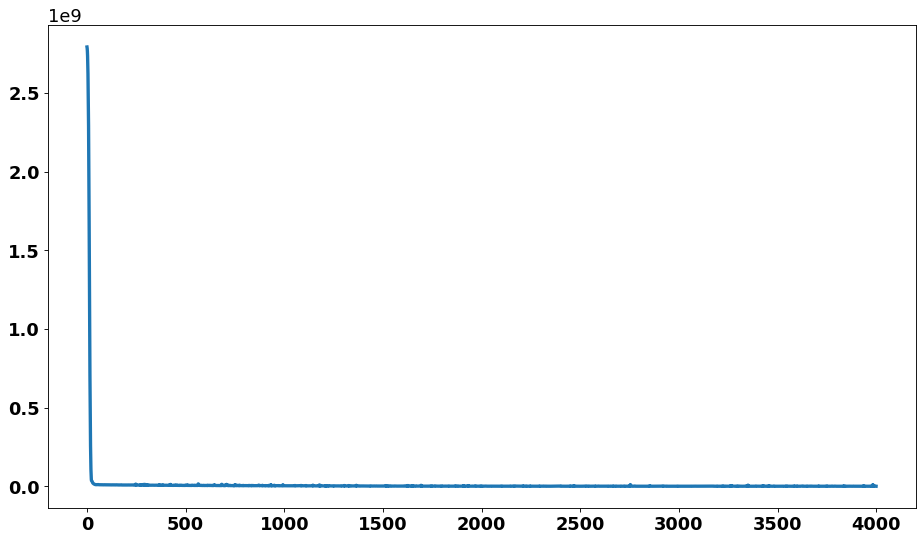

In [34]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(16)
# plt.title('Convergence Rate')
plt.plot(fitting_amfe.history['loss'], linewidth = 3)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [35]:
min(fitting_amfe.history['loss'])

485193.94146634615

#### Training parameters (weights and biases) values of trained ANN 

In [36]:
customizeAnn = ann_model_for_evaluation.customize() 
print('Input Layer weights: \n', customizeAnn.layers[0].get_weights()[0])
print('\n Hidden Layer 1 biases: \n', customizeAnn.layers[0].get_weights()[1])
print('\n Hidden Layer 1 weights: \n', customizeAnn.layers[1].get_weights()[0])
print('\n output Layer biases: \n', customizeAnn.layers[1].get_weights()[1])

Input Layer weights: 
 [[ 14.785865   15.613738   15.285133  ...  -6.111761   14.447961
   14.807752 ]
 [ 18.652292   17.522127   18.904552  ...   5.014001   15.722631
   19.255638 ]
 [ 17.46653    12.965291   15.327284  ...  13.419716   11.365344
   17.758783 ]
 [ 11.930483    3.2536752   5.113413  ...  18.940264    2.4113805
   12.275919 ]
 [  2.188346  -10.77313   -10.522477  ...  21.930292  -10.901553
    2.5100596]
 [-11.398933  -29.363956  -30.717722  ...  22.595963  -28.108078
  -10.818835 ]]

 Hidden Layer 1 biases: 
 [ -7.2958984    4.082231    -9.94089     -2.54946      1.7494506
  -3.1752155   -6.9814057   -7.370161   -37.802418   -29.41243
 -29.087006   -38.294548   -21.93712     -6.717033   -28.477417
  -6.959682     2.3354092    3.5284696   -1.5938841  -34.053608
  -3.4038393    1.2452905  -37.836338   -25.323572    -7.595358
 -36.525322   -37.40149    -37.195236   -28.892553    11.545685
 -34.407845     2.7677612  -37.043755   -34.174553    12.702623
  -5.892476   -19.36

#### Evaluating model on train and test sets

In [37]:
ann_evaluation_model_prediction_on_training = ann_model_for_evaluation.predict(input_train_tf)
ann_evaluation_model_prediction_on_test = ann_model_for_evaluation.predict(input_test_tf)

#### An evaluation report of ANN and metrics

In [38]:
ann_model_for_evaluation_customize = ann_model_for_evaluation.customize()
print(ann_model_for_evaluation_customize.evaluate(input_train_tf, output_train_tf))
print(ann_model_for_evaluation_customize.evaluate(input_test_tf, output_test_tf))
# forecasting_fitting.history.keys()

130/130 [==============================] - 0s 1ms/sample - loss: 522862.9643 - MeanAbsoluteError: 308.8898
[522862.9643479567, 308.88983]
7/7 [==============================] - 0s 428us/sample - loss: 125095856.0000 - MeanAbsoluteError: 7497.9302
[125095856.0, 7497.93]


#### Saving Model

In [39]:
# customizeAnn = ann_model_for_evaluation.customize() 
# customizeAnn.save_weights('./Trained_Models/Saved_model_1')

#### Loadin Model

In [40]:
# ann_model_for_evaluation = ann_model_for_evaluation.customize()
# ann_model_for_evaluation.load_weights('./Trained_Models/Sigmoid+Relu+200_KernelRegularize_3Outputs_1E-1LearnRate_OtherDefaults')

<h4>Plots between Predictions and Acutal Data for Training and Test Set</h4>
<p>The graphs has been plotted for training and test sets where grpahs in first column are showing predictions and 2nd column is represeting error between predicted and actual value.
    <br>
First row graphs is plotted for training data. 2nd row graph is plotted for test data.
    <br>
Remember: Training and test data were splitted by taking 0.05 ratio for test data with no randomization.</p>

In [41]:
# min(ann_evaluation_model_prediction_on_test)
np.max(ann_evaluation_model_prediction_on_test)
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e3)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e3)))
y_ticks.shape


(322,)

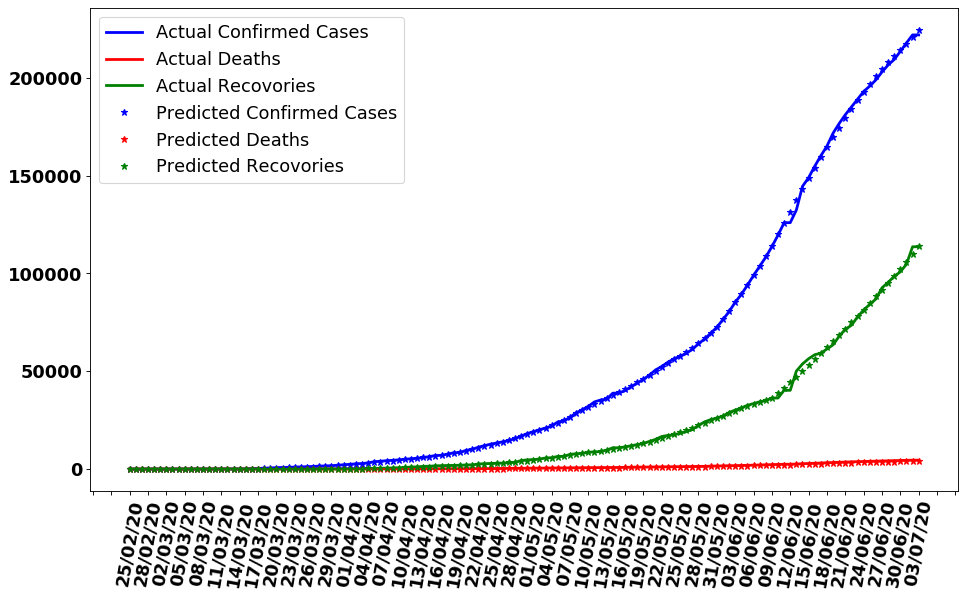

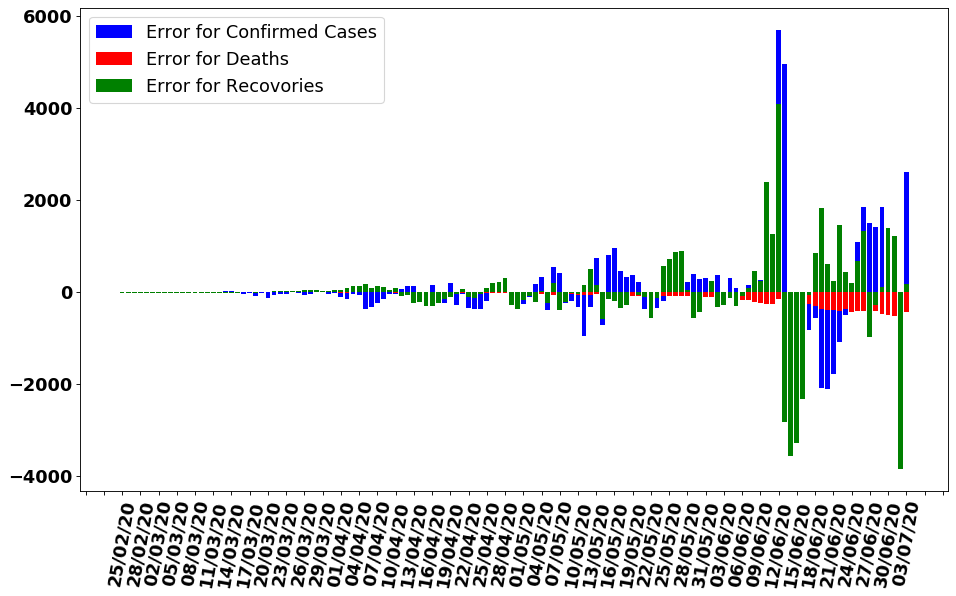

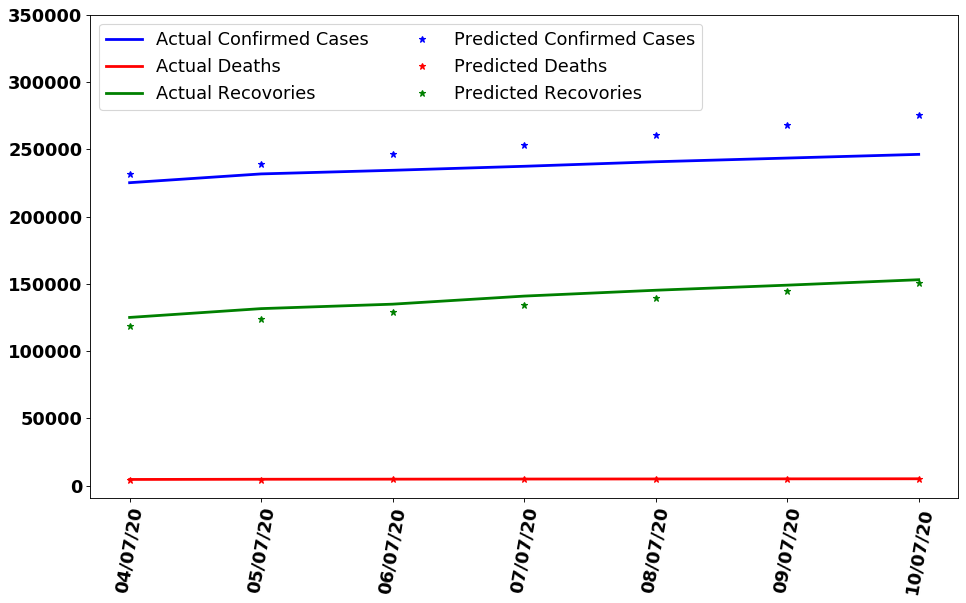

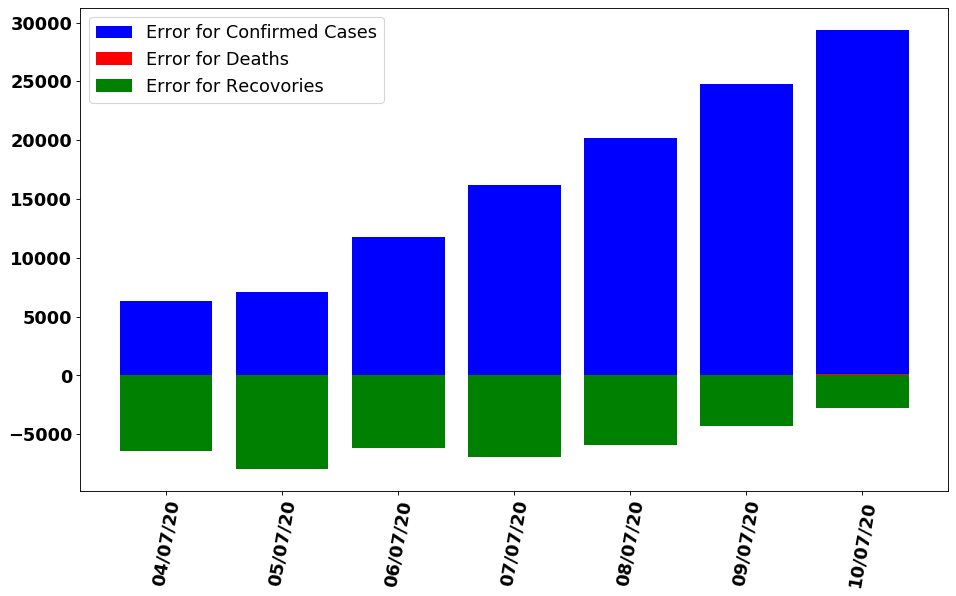

In [42]:
# plt.subplot(322).set_title("Error Graph for Confirmed Cases")

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Fitting ANN Model on Training Data")
plt.plot(dates_train, output_train_tf[:,0], 'b', output_train_tf[:,1], 'r', output_train_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_train, 
         ann_evaluation_model_prediction_on_training[:,0], '*b', 
         ann_evaluation_model_prediction_on_training[:,1], '*r', 
         ann_evaluation_model_prediction_on_training[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,0].reshape(-1,) - output_train_tf[:,0]), color = 'b')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,1].reshape(-1,) - output_train_tf[:,1]), color = 'r')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,2].reshape(-1,) - output_train_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()


figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Evaluating ANN Model on Test Data")
plt.plot(dates_test, output_test_tf[:,0], 'b', output_test_tf[:,1], 'r', output_test_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_test, 
         ann_evaluation_model_prediction_on_test[:,0], '*b', 
         ann_evaluation_model_prediction_on_test[:,1], '*r', 
         ann_evaluation_model_prediction_on_test[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 16}, loc='upper left', ncol=2)
plt.xticks(rotation=80, weight='bold');
# y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
#                     np.max(ann_evaluation_model_prediction_on_test), 1e4)
# y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e4)))
plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
plt.show()

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,0].reshape(-1,) - output_test_tf[:,0]), color = 'b')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,1].reshape(-1,) - output_test_tf[:,1]), color = 'r')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,2].reshape(-1,) - output_test_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

## 2 - Training on whole data and prediction on future data

In [43]:
output_data_tf = tf.convert_to_tensor(np.array(conf_death_recov), dtype=tf.float32)
input_data_tf = tf.convert_to_tensor(np.array(input_data_scaled), dtype=tf.float32)
ann_model_for_future = annModel(input_data_tf, output_data_tf)
ann_model_for_future.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               1400      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [44]:
fitting_amff = ann_model_for_future.fit(best_epochs)

Train on 137 samples
Epoch 1/4000
137/137 [==============================] - 1s 4ms/sample - loss: 3943246223.8832 - MeanAbsoluteError: 29247.8965
Epoch 2/4000
137/137 [==============================] - 0s 95us/sample - loss: 3925845672.1752 - MeanAbsoluteError: 29149.5762
Epoch 3/4000
137/137 [==============================] - 0s 131us/sample - loss: 3874659757.7810 - MeanAbsoluteError: 28868.5312
Epoch 4/4000
137/137 [==============================] - 0s 131us/sample - loss: 3803828501.9562 - MeanAbsoluteError: 28460.4570
Epoch 5/4000
137/137 [==============================] - 0s 131us/sample - loss: 3695730243.2701 - MeanAbsoluteError: 27972.6934
Epoch 6/4000
137/137 [==============================] - 0s 109us/sample - loss: 3548385000.6423 - MeanAbsoluteError: 27450.4727
Epoch 7/4000
137/137 [==============================] - 0s 131us/sample - loss: 3352681666.3358 - MeanAbsoluteError: 26663.2676
Epoch 8/4000
137/137 [==============================] - 0s 117us/sample - loss: 309705

137/137 [==============================] - 0s 117us/sample - loss: 19440270.1168 - MeanAbsoluteError: 2249.9077
Epoch 66/4000
137/137 [==============================] - 0s 146us/sample - loss: 19341081.5912 - MeanAbsoluteError: 2247.6360
Epoch 67/4000
137/137 [==============================] - 0s 102us/sample - loss: 19293978.1314 - MeanAbsoluteError: 2258.4226
Epoch 68/4000
137/137 [==============================] - 0s 124us/sample - loss: 19182590.8321 - MeanAbsoluteError: 2269.9265
Epoch 69/4000
137/137 [==============================] - 0s 124us/sample - loss: 19164666.0584 - MeanAbsoluteError: 2271.9451
Epoch 70/4000
137/137 [==============================] - 0s 139us/sample - loss: 19170798.9380 - MeanAbsoluteError: 2264.8367
Epoch 71/4000
137/137 [==============================] - 0s 124us/sample - loss: 19096015.2409 - MeanAbsoluteError: 2256.2495
Epoch 72/4000
137/137 [==============================] - 0s 117us/sample - loss: 19075030.4307 - MeanAbsoluteError: 2258.9907
Epoch 

Epoch 129/4000
137/137 [==============================] - 0s 131us/sample - loss: 17537115.0584 - MeanAbsoluteError: 2221.1648
Epoch 130/4000
137/137 [==============================] - 0s 109us/sample - loss: 17432968.5401 - MeanAbsoluteError: 2202.9238
Epoch 131/4000
137/137 [==============================] - 0s 146us/sample - loss: 17339629.6533 - MeanAbsoluteError: 2193.7395
Epoch 132/4000
137/137 [==============================] - 0s 124us/sample - loss: 17385463.9270 - MeanAbsoluteError: 2192.9209
Epoch 133/4000
137/137 [==============================] - 0s 131us/sample - loss: 17435151.7007 - MeanAbsoluteError: 2200.0435
Epoch 134/4000
137/137 [==============================] - 0s 117us/sample - loss: 17295892.1241 - MeanAbsoluteError: 2194.2495
Epoch 135/4000
137/137 [==============================] - 0s 95us/sample - loss: 17220908.5401 - MeanAbsoluteError: 2204.9089
Epoch 136/4000
137/137 [==============================] - 0s 139us/sample - loss: 17170230.9124 - MeanAbsoluteEr

Epoch 193/4000
137/137 [==============================] - 0s 109us/sample - loss: 15613314.5547 - MeanAbsoluteError: 2044.6177
Epoch 194/4000
137/137 [==============================] - 0s 117us/sample - loss: 15586607.3942 - MeanAbsoluteError: 2034.1227
Epoch 195/4000
137/137 [==============================] - 0s 102us/sample - loss: 15546469.2007 - MeanAbsoluteError: 2024.1027
Epoch 196/4000
137/137 [==============================] - 0s 109us/sample - loss: 15549007.8540 - MeanAbsoluteError: 2020.4598
Epoch 197/4000
137/137 [==============================] - 0s 95us/sample - loss: 15529874.9124 - MeanAbsoluteError: 2030.1586
Epoch 198/4000
137/137 [==============================] - 0s 102us/sample - loss: 15584166.8175 - MeanAbsoluteError: 2038.9380
Epoch 199/4000
137/137 [==============================] - 0s 117us/sample - loss: 15455973.3723 - MeanAbsoluteError: 2026.1663
Epoch 200/4000
137/137 [==============================] - 0s 95us/sample - loss: 15586089.4453 - MeanAbsoluteErr

137/137 [==============================] - 0s 109us/sample - loss: 13627922.5146 - MeanAbsoluteError: 1850.6942
Epoch 258/4000
137/137 [==============================] - 0s 117us/sample - loss: 13585185.9197 - MeanAbsoluteError: 1847.5121
Epoch 259/4000
137/137 [==============================] - 0s 95us/sample - loss: 13669731.8686 - MeanAbsoluteError: 1851.7676
Epoch 260/4000
137/137 [==============================] - 0s 117us/sample - loss: 13465464.3285 - MeanAbsoluteError: 1838.3997
Epoch 261/4000
137/137 [==============================] - 0s 102us/sample - loss: 13473351.8248 - MeanAbsoluteError: 1825.0225
Epoch 262/4000
137/137 [==============================] - 0s 117us/sample - loss: 13476055.7372 - MeanAbsoluteError: 1810.2133
Epoch 263/4000
137/137 [==============================] - 0s 124us/sample - loss: 13412065.3431 - MeanAbsoluteError: 1799.9314
Epoch 264/4000
137/137 [==============================] - 0s 131us/sample - loss: 13304803.5547 - MeanAbsoluteError: 1810.0563


137/137 [==============================] - 0s 117us/sample - loss: 11502360.8832 - MeanAbsoluteError: 1690.0282
Epoch 321/4000
137/137 [==============================] - 0s 95us/sample - loss: 11528718.6131 - MeanAbsoluteError: 1693.8258
Epoch 322/4000
137/137 [==============================] - 0s 88us/sample - loss: 11505151.3358 - MeanAbsoluteError: 1686.0406
Epoch 323/4000
137/137 [==============================] - 0s 117us/sample - loss: 11532433.4380 - MeanAbsoluteError: 1685.9834
Epoch 324/4000
137/137 [==============================] - 0s 117us/sample - loss: 11477656.8175 - MeanAbsoluteError: 1687.3899
Epoch 325/4000
137/137 [==============================] - 0s 109us/sample - loss: 11441894.2920 - MeanAbsoluteError: 1685.0037
Epoch 326/4000
137/137 [==============================] - 0s 131us/sample - loss: 11595422.9562 - MeanAbsoluteError: 1681.7424
Epoch 327/4000
137/137 [==============================] - 0s 117us/sample - loss: 11343265.2044 - MeanAbsoluteError: 1669.6384
E

137/137 [==============================] - 0s 95us/sample - loss: 9728662.2464 - MeanAbsoluteError: 1556.0199
Epoch 385/4000
137/137 [==============================] - 0s 117us/sample - loss: 9681991.3212 - MeanAbsoluteError: 1545.5255
Epoch 386/4000
137/137 [==============================] - 0s 95us/sample - loss: 9683439.9197 - MeanAbsoluteError: 1548.7866
Epoch 387/4000
137/137 [==============================] - 0s 102us/sample - loss: 9665848.0547 - MeanAbsoluteError: 1555.8032
Epoch 388/4000
137/137 [==============================] - 0s 109us/sample - loss: 9982318.8723 - MeanAbsoluteError: 1548.3517
Epoch 389/4000
137/137 [==============================] - 0s 102us/sample - loss: 9879227.4599 - MeanAbsoluteError: 1558.2487
Epoch 390/4000
137/137 [==============================] - 0s 153us/sample - loss: 9584238.4818 - MeanAbsoluteError: 1581.8517
Epoch 391/4000
137/137 [==============================] - 0s 117us/sample - loss: 9788577.3285 - MeanAbsoluteError: 1564.5256
Epoch 392

137/137 [==============================] - 0s 95us/sample - loss: 8289711.0219 - MeanAbsoluteError: 1424.0145
Epoch 449/4000
137/137 [==============================] - 0s 102us/sample - loss: 7976842.4234 - MeanAbsoluteError: 1426.2114
Epoch 450/4000
137/137 [==============================] - 0s 109us/sample - loss: 7919575.5693 - MeanAbsoluteError: 1429.0256
Epoch 451/4000
137/137 [==============================] - 0s 109us/sample - loss: 7880168.0876 - MeanAbsoluteError: 1412.5135
Epoch 452/4000
137/137 [==============================] - 0s 109us/sample - loss: 7886303.1022 - MeanAbsoluteError: 1407.3771
Epoch 453/4000
137/137 [==============================] - 0s 109us/sample - loss: 7821122.3066 - MeanAbsoluteError: 1411.0593
Epoch 454/4000
137/137 [==============================] - 0s 95us/sample - loss: 7904382.1387 - MeanAbsoluteError: 1423.2081
Epoch 455/4000
137/137 [==============================] - 0s 109us/sample - loss: 8086011.0219 - MeanAbsoluteError: 1419.7031
Epoch 456

137/137 [==============================] - 0s 314us/sample - loss: 6319705.9891 - MeanAbsoluteError: 1257.2247
Epoch 513/4000
137/137 [==============================] - 0s 248us/sample - loss: 6298089.7993 - MeanAbsoluteError: 1265.7572
Epoch 514/4000
137/137 [==============================] - 0s 182us/sample - loss: 6298737.0073 - MeanAbsoluteError: 1275.2793
Epoch 515/4000
137/137 [==============================] - 0s 139us/sample - loss: 6286408.7901 - MeanAbsoluteError: 1258.0807
Epoch 516/4000
137/137 [==============================] - 0s 117us/sample - loss: 6315301.8285 - MeanAbsoluteError: 1252.7312
Epoch 517/4000
137/137 [==============================] - 0s 168us/sample - loss: 6244971.3431 - MeanAbsoluteError: 1241.8905
Epoch 518/4000
137/137 [==============================] - 0s 131us/sample - loss: 6376448.4307 - MeanAbsoluteError: 1262.0952
Epoch 519/4000
137/137 [==============================] - 0s 117us/sample - loss: 6215458.3723 - MeanAbsoluteError: 1246.3741
Epoch 5

137/137 [==============================] - 0s 109us/sample - loss: 4792895.9361 - MeanAbsoluteError: 1082.7322
Epoch 577/4000
137/137 [==============================] - 0s 124us/sample - loss: 4943760.9489 - MeanAbsoluteError: 1086.5553
Epoch 578/4000
137/137 [==============================] - 0s 102us/sample - loss: 4795556.2591 - MeanAbsoluteError: 1091.9076
Epoch 579/4000
137/137 [==============================] - 0s 117us/sample - loss: 4818826.0137 - MeanAbsoluteError: 1089.6763
Epoch 580/4000
137/137 [==============================] - 0s 109us/sample - loss: 4773673.9854 - MeanAbsoluteError: 1079.7141
Epoch 581/4000
137/137 [==============================] - 0s 117us/sample - loss: 4770349.6423 - MeanAbsoluteError: 1066.2966
Epoch 582/4000
137/137 [==============================] - 0s 109us/sample - loss: 4966249.3869 - MeanAbsoluteError: 1093.2631
Epoch 583/4000
137/137 [==============================] - 0s 131us/sample - loss: 4830895.8996 - MeanAbsoluteError: 1080.8191
Epoch 5

137/137 [==============================] - 0s 95us/sample - loss: 3699566.2628 - MeanAbsoluteError: 935.8268
Epoch 641/4000
137/137 [==============================] - 0s 102us/sample - loss: 3676412.0219 - MeanAbsoluteError: 919.7202
Epoch 642/4000
137/137 [==============================] - 0s 124us/sample - loss: 3628188.1277 - MeanAbsoluteError: 920.0469
Epoch 643/4000
137/137 [==============================] - 0s 139us/sample - loss: 3826266.1752 - MeanAbsoluteError: 949.9882
Epoch 644/4000
137/137 [==============================] - 0s 102us/sample - loss: 3667485.8905 - MeanAbsoluteError: 912.4316
Epoch 645/4000
137/137 [==============================] - 0s 131us/sample - loss: 3898154.9690 - MeanAbsoluteError: 909.0579
Epoch 646/4000
137/137 [==============================] - 0s 124us/sample - loss: 3610339.8422 - MeanAbsoluteError: 919.4484
Epoch 647/4000
137/137 [==============================] - 0s 175us/sample - loss: 3807164.1971 - MeanAbsoluteError: 934.8434
Epoch 648/4000
1

137/137 [==============================] - 0s 117us/sample - loss: 2876936.1396 - MeanAbsoluteError: 809.5123
Epoch 706/4000
137/137 [==============================] - 0s 102us/sample - loss: 2889834.3485 - MeanAbsoluteError: 807.9885
Epoch 707/4000
137/137 [==============================] - 0s 109us/sample - loss: 2722217.8431 - MeanAbsoluteError: 793.7228
Epoch 708/4000
137/137 [==============================] - 0s 87us/sample - loss: 2886641.0328 - MeanAbsoluteError: 824.7210
Epoch 709/4000
137/137 [==============================] - 0s 102us/sample - loss: 2835049.7051 - MeanAbsoluteError: 804.6703
Epoch 710/4000
137/137 [==============================] - 0s 95us/sample - loss: 2693757.7026 - MeanAbsoluteError: 774.5460
Epoch 711/4000
137/137 [==============================] - 0s 117us/sample - loss: 2821900.4015 - MeanAbsoluteError: 808.3727
Epoch 712/4000
137/137 [==============================] - 0s 102us/sample - loss: 2853457.7518 - MeanAbsoluteError: 778.2014
Epoch 713/4000
13

137/137 [==============================] - 0s 109us/sample - loss: 2290971.3796 - MeanAbsoluteError: 689.5034
Epoch 770/4000
137/137 [==============================] - 0s 109us/sample - loss: 2123337.2135 - MeanAbsoluteError: 703.9487
Epoch 771/4000
137/137 [==============================] - 0s 124us/sample - loss: 1992999.0474 - MeanAbsoluteError: 672.8373
Epoch 772/4000
137/137 [==============================] - 0s 124us/sample - loss: 2234848.0821 - MeanAbsoluteError: 688.8353
Epoch 773/4000
137/137 [==============================] - 0s 117us/sample - loss: 2066145.6925 - MeanAbsoluteError: 686.6848
Epoch 774/4000
137/137 [==============================] - 0s 117us/sample - loss: 2030433.5876 - MeanAbsoluteError: 671.2155
Epoch 775/4000
137/137 [==============================] - 0s 109us/sample - loss: 2026485.2632 - MeanAbsoluteError: 669.8094
Epoch 776/4000
137/137 [==============================] - 0s 117us/sample - loss: 2040175.2336 - MeanAbsoluteError: 681.4081
Epoch 777/4000


137/137 [==============================] - 0s 80us/sample - loss: 1769277.2710 - MeanAbsoluteError: 640.1878
Epoch 835/4000
137/137 [==============================] - 0s 109us/sample - loss: 1734738.5114 - MeanAbsoluteError: 615.1657
Epoch 836/4000
137/137 [==============================] - 0s 109us/sample - loss: 1651040.1040 - MeanAbsoluteError: 598.2327
Epoch 837/4000
137/137 [==============================] - 0s 102us/sample - loss: 1615410.7386 - MeanAbsoluteError: 599.2478
Epoch 838/4000
137/137 [==============================] - 0s 102us/sample - loss: 1672891.0766 - MeanAbsoluteError: 612.6437
Epoch 839/4000
137/137 [==============================] - 0s 80us/sample - loss: 1661680.1569 - MeanAbsoluteError: 594.3452
Epoch 840/4000
137/137 [==============================] - 0s 102us/sample - loss: 1611572.8777 - MeanAbsoluteError: 599.6834
Epoch 841/4000
137/137 [==============================] - 0s 102us/sample - loss: 1652817.9120 - MeanAbsoluteError: 601.5458
Epoch 842/4000
13

137/137 [==============================] - 0s 139us/sample - loss: 1455567.7892 - MeanAbsoluteError: 572.2958
Epoch 900/4000
137/137 [==============================] - 0s 102us/sample - loss: 1426507.8029 - MeanAbsoluteError: 583.0688
Epoch 901/4000
137/137 [==============================] - 0s 102us/sample - loss: 1426324.7724 - MeanAbsoluteError: 570.0573
Epoch 902/4000
137/137 [==============================] - 0s 124us/sample - loss: 1510451.7847 - MeanAbsoluteError: 589.4585
Epoch 903/4000
137/137 [==============================] - 0s 95us/sample - loss: 1510288.7573 - MeanAbsoluteError: 585.8397
Epoch 904/4000
137/137 [==============================] - 0s 117us/sample - loss: 1553465.7276 - MeanAbsoluteError: 586.6460
Epoch 905/4000
137/137 [==============================] - 0s 124us/sample - loss: 1454606.1469 - MeanAbsoluteError: 548.8488
Epoch 906/4000
137/137 [==============================] - 0s 117us/sample - loss: 1410679.5401 - MeanAbsoluteError: 553.5802
Epoch 907/4000
1

137/137 [==============================] - 0s 146us/sample - loss: 1500731.9544 - MeanAbsoluteError: 555.1940
Epoch 965/4000
137/137 [==============================] - 0s 109us/sample - loss: 1486810.7336 - MeanAbsoluteError: 549.0979
Epoch 966/4000
137/137 [==============================] - 0s 95us/sample - loss: 1390446.5322 - MeanAbsoluteError: 555.2297
Epoch 967/4000
137/137 [==============================] - 0s 102us/sample - loss: 1448845.6214 - MeanAbsoluteError: 529.1615
Epoch 968/4000
137/137 [==============================] - 0s 95us/sample - loss: 1299963.3463 - MeanAbsoluteError: 517.1612
Epoch 969/4000
137/137 [==============================] - 0s 139us/sample - loss: 1290756.9843 - MeanAbsoluteError: 536.6368
Epoch 970/4000
137/137 [==============================] - 0s 109us/sample - loss: 1280670.6528 - MeanAbsoluteError: 503.0032
Epoch 971/4000
137/137 [==============================] - 0s 109us/sample - loss: 1223492.7596 - MeanAbsoluteError: 495.9353
Epoch 972/4000
13

137/137 [==============================] - 0s 102us/sample - loss: 1135583.7651 - MeanAbsoluteError: 487.2193
Epoch 1030/4000
137/137 [==============================] - 0s 124us/sample - loss: 1134542.7299 - MeanAbsoluteError: 488.9885
Epoch 1031/4000
137/137 [==============================] - 0s 117us/sample - loss: 1111451.3791 - MeanAbsoluteError: 478.2072
Epoch 1032/4000
137/137 [==============================] - 0s 95us/sample - loss: 1174908.7116 - MeanAbsoluteError: 480.9653
Epoch 1033/4000
137/137 [==============================] - 0s 117us/sample - loss: 1112583.2924 - MeanAbsoluteError: 475.1491
Epoch 1034/4000
137/137 [==============================] - 0s 109us/sample - loss: 1152686.1323 - MeanAbsoluteError: 491.2354
Epoch 1035/4000
137/137 [==============================] - 0s 102us/sample - loss: 1122838.3335 - MeanAbsoluteError: 479.3984
Epoch 1036/4000
137/137 [==============================] - 0s 109us/sample - loss: 1099502.7984 - MeanAbsoluteError: 475.4043
Epoch 103

137/137 [==============================] - 0s 168us/sample - loss: 1226219.2061 - MeanAbsoluteError: 509.4606
Epoch 1094/4000
137/137 [==============================] - 0s 168us/sample - loss: 1119272.1163 - MeanAbsoluteError: 496.5061
Epoch 1095/4000
137/137 [==============================] - 0s 219us/sample - loss: 1054322.5009 - MeanAbsoluteError: 468.0088
Epoch 1096/4000
137/137 [==============================] - 0s 175us/sample - loss: 1104831.3066 - MeanAbsoluteError: 471.3134
Epoch 1097/4000
137/137 [==============================] - 0s 241us/sample - loss: 1101349.9535 - MeanAbsoluteError: 474.7772
Epoch 1098/4000
137/137 [==============================] - 0s 175us/sample - loss: 1247744.0315 - MeanAbsoluteError: 501.3561
Epoch 1099/4000
137/137 [==============================] - 0s 146us/sample - loss: 1153968.5721 - MeanAbsoluteError: 482.5284
Epoch 1100/4000
137/137 [==============================] - 0s 124us/sample - loss: 1132214.4411 - MeanAbsoluteError: 465.3376
Epoch 11

137/137 [==============================] - 0s 109us/sample - loss: 1066043.3577 - MeanAbsoluteError: 454.5256
Epoch 1159/4000
137/137 [==============================] - 0s 88us/sample - loss: 1096626.5684 - MeanAbsoluteError: 471.6476
Epoch 1160/4000
137/137 [==============================] - 0s 95us/sample - loss: 1117249.8412 - MeanAbsoluteError: 478.2185
Epoch 1161/4000
137/137 [==============================] - 0s 102us/sample - loss: 1180796.4678 - MeanAbsoluteError: 489.2043
Epoch 1162/4000
137/137 [==============================] - 0s 88us/sample - loss: 1056104.8987 - MeanAbsoluteError: 481.7698
Epoch 1163/4000
137/137 [==============================] - 0s 117us/sample - loss: 1011847.3033 - MeanAbsoluteError: 463.5975
Epoch 1164/4000
137/137 [==============================] - 0s 124us/sample - loss: 1174685.9922 - MeanAbsoluteError: 475.1278
Epoch 1165/4000
137/137 [==============================] - 0s 139us/sample - loss: 1028753.9018 - MeanAbsoluteError: 449.4843
Epoch 1166/

137/137 [==============================] - 0s 102us/sample - loss: 1043096.6805 - MeanAbsoluteError: 442.9868
Epoch 1223/4000
137/137 [==============================] - 0s 124us/sample - loss: 1054669.3599 - MeanAbsoluteError: 439.5077
Epoch 1224/4000
137/137 [==============================] - 0s 80us/sample - loss: 997091.3093 - MeanAbsoluteError: 437.8539
Epoch 1225/4000
137/137 [==============================] - 0s 95us/sample - loss: 958020.3654 - MeanAbsoluteError: 427.1645
Epoch 1226/4000
137/137 [==============================] - 0s 109us/sample - loss: 942200.9480 - MeanAbsoluteError: 423.9879
Epoch 1227/4000
137/137 [==============================] - 0s 139us/sample - loss: 956317.8631 - MeanAbsoluteError: 427.9146
Epoch 1228/4000
137/137 [==============================] - 0s 109us/sample - loss: 1010286.8029 - MeanAbsoluteError: 434.3164
Epoch 1229/4000
137/137 [==============================] - 0s 124us/sample - loss: 1092466.8257 - MeanAbsoluteError: 457.5848
Epoch 1230/400

137/137 [==============================] - 0s 109us/sample - loss: 936705.1113 - MeanAbsoluteError: 428.5387
Epoch 1288/4000
137/137 [==============================] - 0s 102us/sample - loss: 1036407.7856 - MeanAbsoluteError: 425.5037
Epoch 1289/4000
137/137 [==============================] - 0s 117us/sample - loss: 1178777.4133 - MeanAbsoluteError: 472.8129
Epoch 1290/4000
137/137 [==============================] - 0s 102us/sample - loss: 950751.3791 - MeanAbsoluteError: 424.7341
Epoch 1291/4000
137/137 [==============================] - 0s 124us/sample - loss: 925698.1141 - MeanAbsoluteError: 424.1038
Epoch 1292/4000
137/137 [==============================] - 0s 139us/sample - loss: 946260.3996 - MeanAbsoluteError: 425.6373
Epoch 1293/4000
137/137 [==============================] - 0s 146us/sample - loss: 1044901.3303 - MeanAbsoluteError: 439.9886
Epoch 1294/4000
137/137 [==============================] - 0s 124us/sample - loss: 984825.9665 - MeanAbsoluteError: 438.0428
Epoch 1295/40

Epoch 1352/4000
137/137 [==============================] - 0s 131us/sample - loss: 999443.8476 - MeanAbsoluteError: 430.3661
Epoch 1353/4000
137/137 [==============================] - 0s 109us/sample - loss: 909132.7527 - MeanAbsoluteError: 424.6714
Epoch 1354/4000
137/137 [==============================] - 0s 102us/sample - loss: 890481.6759 - MeanAbsoluteError: 417.5695
Epoch 1355/4000
137/137 [==============================] - 0s 124us/sample - loss: 909910.0648 - MeanAbsoluteError: 426.2658
Epoch 1356/4000
137/137 [==============================] - 0s 102us/sample - loss: 905673.8395 - MeanAbsoluteError: 425.3389
Epoch 1357/4000
137/137 [==============================] - 0s 124us/sample - loss: 890744.6925 - MeanAbsoluteError: 409.2786
Epoch 1358/4000
137/137 [==============================] - 0s 168us/sample - loss: 933181.5073 - MeanAbsoluteError: 424.4915
Epoch 1359/4000
137/137 [==============================] - 0s 131us/sample - loss: 971962.3577 - MeanAbsoluteError: 431.6596


137/137 [==============================] - 0s 131us/sample - loss: 1125167.7655 - MeanAbsoluteError: 462.7960
Epoch 1417/4000
137/137 [==============================] - 0s 284us/sample - loss: 963685.3942 - MeanAbsoluteError: 420.7977
Epoch 1418/4000
137/137 [==============================] - 0s 117us/sample - loss: 1146282.3796 - MeanAbsoluteError: 484.8141
Epoch 1419/4000
137/137 [==============================] - 0s 95us/sample - loss: 949620.8309 - MeanAbsoluteError: 430.8886
Epoch 1420/4000
137/137 [==============================] - 0s 95us/sample - loss: 884271.6761 - MeanAbsoluteError: 419.6226
Epoch 1421/4000
137/137 [==============================] - 0s 153us/sample - loss: 964863.6104 - MeanAbsoluteError: 449.3817
Epoch 1422/4000
137/137 [==============================] - 0s 117us/sample - loss: 887007.6460 - MeanAbsoluteError: 447.4761
Epoch 1423/4000
137/137 [==============================] - 0s 95us/sample - loss: 946935.0078 - MeanAbsoluteError: 447.3159
Epoch 1424/4000
1

137/137 [==============================] - 0s 117us/sample - loss: 1017243.4250 - MeanAbsoluteError: 430.0477
Epoch 1482/4000
137/137 [==============================] - 0s 109us/sample - loss: 1125775.5552 - MeanAbsoluteError: 453.5374
Epoch 1483/4000
137/137 [==============================] - 0s 102us/sample - loss: 1160461.3521 - MeanAbsoluteError: 448.3957
Epoch 1484/4000
137/137 [==============================] - 0s 117us/sample - loss: 1398657.2712 - MeanAbsoluteError: 501.9351
Epoch 1485/4000
137/137 [==============================] - 0s 255us/sample - loss: 1270645.9576 - MeanAbsoluteError: 468.1317
Epoch 1486/4000
137/137 [==============================] - 0s 233us/sample - loss: 1389121.2828 - MeanAbsoluteError: 493.0408
Epoch 1487/4000
137/137 [==============================] - 0s 314us/sample - loss: 1598555.8869 - MeanAbsoluteError: 502.6991
Epoch 1488/4000
137/137 [==============================] - 0s 131us/sample - loss: 1577372.2026 - MeanAbsoluteError: 553.1866
Epoch 14

137/137 [==============================] - 0s 153us/sample - loss: 951335.0046 - MeanAbsoluteError: 418.3978
Epoch 1547/4000
137/137 [==============================] - 0s 569us/sample - loss: 875060.1380 - MeanAbsoluteError: 414.4718
Epoch 1548/4000
137/137 [==============================] - 0s 416us/sample - loss: 895695.6241 - MeanAbsoluteError: 389.1616
Epoch 1549/4000
137/137 [==============================] - 0s 605us/sample - loss: 899978.2500 - MeanAbsoluteError: 412.6530
Epoch 1550/4000
137/137 [==============================] - 0s 292us/sample - loss: 897959.9402 - MeanAbsoluteError: 404.1064
Epoch 1551/4000
137/137 [==============================] - 0s 153us/sample - loss: 928693.2418 - MeanAbsoluteError: 411.6625
Epoch 1552/4000
137/137 [==============================] - 0s 175us/sample - loss: 829730.3476 - MeanAbsoluteError: 385.0127
Epoch 1553/4000
137/137 [==============================] - 0s 153us/sample - loss: 810174.5584 - MeanAbsoluteError: 379.8614
Epoch 1554/4000


137/137 [==============================] - 0s 102us/sample - loss: 1099609.2792 - MeanAbsoluteError: 441.5505
Epoch 1611/4000
137/137 [==============================] - 0s 153us/sample - loss: 829040.5366 - MeanAbsoluteError: 385.0598
Epoch 1612/4000
137/137 [==============================] - 0s 211us/sample - loss: 888465.7409 - MeanAbsoluteError: 381.9594
Epoch 1613/4000
137/137 [==============================] - 0s 182us/sample - loss: 881686.5440 - MeanAbsoluteError: 403.4897
Epoch 1614/4000
137/137 [==============================] - 0s 168us/sample - loss: 867417.9927 - MeanAbsoluteError: 401.9848
Epoch 1615/4000
137/137 [==============================] - 0s 146us/sample - loss: 927713.5598 - MeanAbsoluteError: 387.0765
Epoch 1616/4000
137/137 [==============================] - 0s 160us/sample - loss: 809639.9745 - MeanAbsoluteError: 380.0536
Epoch 1617/4000
137/137 [==============================] - 0s 153us/sample - loss: 823766.3864 - MeanAbsoluteError: 391.3664
Epoch 1618/4000

137/137 [==============================] - 0s 95us/sample - loss: 829718.9644 - MeanAbsoluteError: 374.1548
Epoch 1676/4000
137/137 [==============================] - 0s 95us/sample - loss: 881272.9799 - MeanAbsoluteError: 386.3483
Epoch 1677/4000
137/137 [==============================] - 0s 95us/sample - loss: 832231.9717 - MeanAbsoluteError: 373.1206
Epoch 1678/4000
137/137 [==============================] - 0s 95us/sample - loss: 920061.9366 - MeanAbsoluteError: 404.7566
Epoch 1679/4000
137/137 [==============================] - 0s 131us/sample - loss: 859773.9653 - MeanAbsoluteError: 398.0629
Epoch 1680/4000
137/137 [==============================] - 0s 95us/sample - loss: 919334.9636 - MeanAbsoluteError: 395.0141
Epoch 1681/4000
137/137 [==============================] - 0s 95us/sample - loss: 826406.1204 - MeanAbsoluteError: 383.4866
Epoch 1682/4000
137/137 [==============================] - 0s 95us/sample - loss: 1006113.3885 - MeanAbsoluteError: 434.4211
Epoch 1683/4000
137/13

137/137 [==============================] - 0s 109us/sample - loss: 987575.4676 - MeanAbsoluteError: 402.0129
Epoch 1740/4000
137/137 [==============================] - 0s 109us/sample - loss: 921835.4005 - MeanAbsoluteError: 420.4217
Epoch 1741/4000
137/137 [==============================] - 0s 95us/sample - loss: 1325209.0999 - MeanAbsoluteError: 491.5291
Epoch 1742/4000
137/137 [==============================] - 0s 102us/sample - loss: 1158473.5091 - MeanAbsoluteError: 477.9887
Epoch 1743/4000
137/137 [==============================] - 0s 102us/sample - loss: 1053676.8732 - MeanAbsoluteError: 440.6700
Epoch 1744/4000
137/137 [==============================] - 0s 102us/sample - loss: 1014172.6102 - MeanAbsoluteError: 429.9281
Epoch 1745/4000
137/137 [==============================] - 0s 153us/sample - loss: 968878.5940 - MeanAbsoluteError: 402.3471
Epoch 1746/4000
137/137 [==============================] - 0s 117us/sample - loss: 1022228.6341 - MeanAbsoluteError: 440.4402
Epoch 1747/4

137/137 [==============================] - 0s 139us/sample - loss: 882695.6385 - MeanAbsoluteError: 454.0763
Epoch 1804/4000
137/137 [==============================] - 0s 160us/sample - loss: 833044.2099 - MeanAbsoluteError: 432.0488
Epoch 1805/4000
137/137 [==============================] - 0s 131us/sample - loss: 787339.5684 - MeanAbsoluteError: 397.8963
Epoch 1806/4000
137/137 [==============================] - 0s 109us/sample - loss: 850530.5947 - MeanAbsoluteError: 427.0213
Epoch 1807/4000
137/137 [==============================] - 0s 102us/sample - loss: 779874.8960 - MeanAbsoluteError: 386.3605
Epoch 1808/4000
137/137 [==============================] - 0s 146us/sample - loss: 896307.2717 - MeanAbsoluteError: 418.9612
Epoch 1809/4000
137/137 [==============================] - 0s 109us/sample - loss: 762135.2974 - MeanAbsoluteError: 400.0473
Epoch 1810/4000
137/137 [==============================] - 0s 117us/sample - loss: 856566.2473 - MeanAbsoluteError: 398.7508
Epoch 1811/4000


137/137 [==============================] - 0s 95us/sample - loss: 814378.3593 - MeanAbsoluteError: 361.0786
Epoch 1868/4000
137/137 [==============================] - 0s 95us/sample - loss: 917230.3723 - MeanAbsoluteError: 394.5658
Epoch 1869/4000
137/137 [==============================] - 0s 88us/sample - loss: 816634.8392 - MeanAbsoluteError: 363.6184
Epoch 1870/4000
137/137 [==============================] - 0s 95us/sample - loss: 856428.2235 - MeanAbsoluteError: 365.5277
Epoch 1871/4000
137/137 [==============================] - 0s 102us/sample - loss: 767972.9138 - MeanAbsoluteError: 359.8339
Epoch 1872/4000
137/137 [==============================] - 0s 109us/sample - loss: 748873.4321 - MeanAbsoluteError: 352.6621
Epoch 1873/4000
137/137 [==============================] - 0s 102us/sample - loss: 768170.2354 - MeanAbsoluteError: 365.5817
Epoch 1874/4000
137/137 [==============================] - 0s 117us/sample - loss: 749946.1537 - MeanAbsoluteError: 351.7929
Epoch 1875/4000
137/

137/137 [==============================] - 0s 139us/sample - loss: 832636.5885 - MeanAbsoluteError: 377.7555
Epoch 1933/4000
137/137 [==============================] - 0s 117us/sample - loss: 773943.9703 - MeanAbsoluteError: 360.4825
Epoch 1934/4000
137/137 [==============================] - 0s 131us/sample - loss: 984149.2245 - MeanAbsoluteError: 423.4331
Epoch 1935/4000
137/137 [==============================] - 0s 182us/sample - loss: 951261.6934 - MeanAbsoluteError: 397.6161
Epoch 1936/4000
137/137 [==============================] - 0s 139us/sample - loss: 774866.7518 - MeanAbsoluteError: 372.7963
Epoch 1937/4000
137/137 [==============================] - 0s 146us/sample - loss: 782134.8066 - MeanAbsoluteError: 376.2597
Epoch 1938/4000
137/137 [==============================] - 0s 146us/sample - loss: 815510.5237 - MeanAbsoluteError: 388.8553
Epoch 1939/4000
137/137 [==============================] - 0s 182us/sample - loss: 966711.2792 - MeanAbsoluteError: 429.6469
Epoch 1940/4000


137/137 [==============================] - 0s 168us/sample - loss: 748983.4140 - MeanAbsoluteError: 364.2122
Epoch 1997/4000
137/137 [==============================] - 0s 117us/sample - loss: 767508.1980 - MeanAbsoluteError: 354.2762
Epoch 1998/4000
137/137 [==============================] - 0s 146us/sample - loss: 832788.5173 - MeanAbsoluteError: 385.3236
Epoch 1999/4000
137/137 [==============================] - 0s 95us/sample - loss: 921313.8969 - MeanAbsoluteError: 392.1847
Epoch 2000/4000
137/137 [==============================] - 0s 117us/sample - loss: 740309.3802 - MeanAbsoluteError: 350.7802
Epoch 2001/4000
137/137 [==============================] - 0s 131us/sample - loss: 842391.4161 - MeanAbsoluteError: 377.4935
Epoch 2002/4000
137/137 [==============================] - 0s 109us/sample - loss: 811212.9626 - MeanAbsoluteError: 365.1234
Epoch 2003/4000
137/137 [==============================] - 0s 211us/sample - loss: 937466.4074 - MeanAbsoluteError: 394.1160
Epoch 2004/4000
1

137/137 [==============================] - 0s 131us/sample - loss: 823678.0844 - MeanAbsoluteError: 369.9533
Epoch 2062/4000
137/137 [==============================] - 0s 95us/sample - loss: 804259.0055 - MeanAbsoluteError: 380.7572
Epoch 2063/4000
137/137 [==============================] - 0s 109us/sample - loss: 727790.9713 - MeanAbsoluteError: 350.7820
Epoch 2064/4000
137/137 [==============================] - 0s 117us/sample - loss: 823007.1086 - MeanAbsoluteError: 377.5679
Epoch 2065/4000
137/137 [==============================] - 0s 95us/sample - loss: 883764.5055 - MeanAbsoluteError: 397.8215
Epoch 2066/4000
137/137 [==============================] - 0s 131us/sample - loss: 812779.8682 - MeanAbsoluteError: 358.9381
Epoch 2067/4000
137/137 [==============================] - 0s 131us/sample - loss: 781640.9532 - MeanAbsoluteError: 377.7690
Epoch 2068/4000
137/137 [==============================] - 0s 139us/sample - loss: 799575.6542 - MeanAbsoluteError: 371.9546
Epoch 2069/4000
13

137/137 [==============================] - 0s 153us/sample - loss: 926489.0146 - MeanAbsoluteError: 387.7818
Epoch 2126/4000
137/137 [==============================] - 0s 204us/sample - loss: 785104.4471 - MeanAbsoluteError: 366.3864
Epoch 2127/4000
137/137 [==============================] - 0s 109us/sample - loss: 941610.7817 - MeanAbsoluteError: 392.5743
Epoch 2128/4000
137/137 [==============================] - 0s 102us/sample - loss: 794980.3193 - MeanAbsoluteError: 365.3288
Epoch 2129/4000
137/137 [==============================] - 0s 102us/sample - loss: 762736.2126 - MeanAbsoluteError: 352.8866
Epoch 2130/4000
137/137 [==============================] - 0s 117us/sample - loss: 676246.7624 - MeanAbsoluteError: 340.3652
Epoch 2131/4000
137/137 [==============================] - 0s 109us/sample - loss: 806572.0379 - MeanAbsoluteError: 357.8864
Epoch 2132/4000
137/137 [==============================] - 0s 102us/sample - loss: 853195.3832 - MeanAbsoluteError: 375.0013
Epoch 2133/4000


137/137 [==============================] - 0s 168us/sample - loss: 1009775.3865 - MeanAbsoluteError: 412.1619
Epoch 2191/4000
137/137 [==============================] - 0s 190us/sample - loss: 928433.4028 - MeanAbsoluteError: 412.6181
Epoch 2192/4000
137/137 [==============================] - 0s 153us/sample - loss: 928673.8763 - MeanAbsoluteError: 380.5172
Epoch 2193/4000
137/137 [==============================] - 0s 124us/sample - loss: 838441.5730 - MeanAbsoluteError: 381.6761
Epoch 2194/4000
137/137 [==============================] - 0s 124us/sample - loss: 1029113.6718 - MeanAbsoluteError: 409.5239
Epoch 2195/4000
137/137 [==============================] - 0s 139us/sample - loss: 894259.9411 - MeanAbsoluteError: 407.5229
Epoch 2196/4000
137/137 [==============================] - 0s 124us/sample - loss: 769046.1816 - MeanAbsoluteError: 366.2544
Epoch 2197/4000
137/137 [==============================] - 0s 139us/sample - loss: 701806.5585 - MeanAbsoluteError: 339.4779
Epoch 2198/400

137/137 [==============================] - 0s 102us/sample - loss: 817300.6241 - MeanAbsoluteError: 355.8856
Epoch 2256/4000
137/137 [==============================] - 0s 131us/sample - loss: 950080.1588 - MeanAbsoluteError: 413.7178
Epoch 2257/4000
137/137 [==============================] - 0s 124us/sample - loss: 1021464.6228 - MeanAbsoluteError: 399.1466
Epoch 2258/4000
137/137 [==============================] - 0s 182us/sample - loss: 1125529.7454 - MeanAbsoluteError: 452.0909
Epoch 2259/4000
137/137 [==============================] - 0s 109us/sample - loss: 1163581.1633 - MeanAbsoluteError: 434.4096
Epoch 2260/4000
137/137 [==============================] - 0s 146us/sample - loss: 1372156.1118 - MeanAbsoluteError: 492.2142
Epoch 2261/4000
137/137 [==============================] - 0s 131us/sample - loss: 1380692.8491 - MeanAbsoluteError: 480.2824
Epoch 2262/4000
137/137 [==============================] - 0s 197us/sample - loss: 1470914.1715 - MeanAbsoluteError: 508.3688
Epoch 2263

137/137 [==============================] - 0s 131us/sample - loss: 787451.3510 - MeanAbsoluteError: 389.5495
Epoch 2321/4000
137/137 [==============================] - 0s 131us/sample - loss: 644506.4131 - MeanAbsoluteError: 345.4750
Epoch 2322/4000
137/137 [==============================] - 0s 153us/sample - loss: 678719.1432 - MeanAbsoluteError: 356.1751
Epoch 2323/4000
137/137 [==============================] - 0s 102us/sample - loss: 636120.3271 - MeanAbsoluteError: 340.2185
Epoch 2324/4000
137/137 [==============================] - 0s 117us/sample - loss: 694792.6277 - MeanAbsoluteError: 355.8952
Epoch 2325/4000
137/137 [==============================] - 0s 102us/sample - loss: 695403.3837 - MeanAbsoluteError: 360.9725
Epoch 2326/4000
137/137 [==============================] - 0s 168us/sample - loss: 669352.0721 - MeanAbsoluteError: 337.2385
Epoch 2327/4000
137/137 [==============================] - 0s 117us/sample - loss: 691182.0109 - MeanAbsoluteError: 354.0782
Epoch 2328/4000


137/137 [==============================] - 0s 124us/sample - loss: 687943.7186 - MeanAbsoluteError: 344.6746
Epoch 2386/4000
137/137 [==============================] - 0s 117us/sample - loss: 731072.3286 - MeanAbsoluteError: 337.6073
Epoch 2387/4000
137/137 [==============================] - 0s 102us/sample - loss: 816821.6796 - MeanAbsoluteError: 383.0455
Epoch 2388/4000
137/137 [==============================] - 0s 124us/sample - loss: 828561.7724 - MeanAbsoluteError: 369.0298
Epoch 2389/4000
137/137 [==============================] - 0s 175us/sample - loss: 653737.5794 - MeanAbsoluteError: 339.9545
Epoch 2390/4000
137/137 [==============================] - 0s 175us/sample - loss: 678054.8431 - MeanAbsoluteError: 340.7431
Epoch 2391/4000
137/137 [==============================] - 0s 146us/sample - loss: 645316.4936 - MeanAbsoluteError: 321.7088
Epoch 2392/4000
137/137 [==============================] - 0s 124us/sample - loss: 652559.7692 - MeanAbsoluteError: 347.7814
Epoch 2393/4000


137/137 [==============================] - 0s 168us/sample - loss: 919542.6804 - MeanAbsoluteError: 417.1827
Epoch 2451/4000
137/137 [==============================] - 0s 131us/sample - loss: 749870.1724 - MeanAbsoluteError: 373.9037
Epoch 2452/4000
137/137 [==============================] - 0s 168us/sample - loss: 776816.4575 - MeanAbsoluteError: 399.1321
Epoch 2453/4000
137/137 [==============================] - 0s 204us/sample - loss: 886409.6223 - MeanAbsoluteError: 383.2379
Epoch 2454/4000
137/137 [==============================] - 0s 314us/sample - loss: 802556.7936 - MeanAbsoluteError: 393.7159
Epoch 2455/4000
137/137 [==============================] - 0s 452us/sample - loss: 865357.9072 - MeanAbsoluteError: 392.0710
Epoch 2456/4000
137/137 [==============================] - 0s 299us/sample - loss: 942835.0675 - MeanAbsoluteError: 413.1634
Epoch 2457/4000
137/137 [==============================] - 0s 314us/sample - loss: 763354.9489 - MeanAbsoluteError: 366.5873
Epoch 2458/4000


137/137 [==============================] - 0s 109us/sample - loss: 644856.3020 - MeanAbsoluteError: 323.7052
Epoch 2516/4000
137/137 [==============================] - 0s 124us/sample - loss: 674424.2778 - MeanAbsoluteError: 328.3876
Epoch 2517/4000
137/137 [==============================] - 0s 131us/sample - loss: 652250.7354 - MeanAbsoluteError: 322.9077
Epoch 2518/4000
137/137 [==============================] - 0s 109us/sample - loss: 673474.6889 - MeanAbsoluteError: 330.8618
Epoch 2519/4000
137/137 [==============================] - 0s 124us/sample - loss: 636403.6186 - MeanAbsoluteError: 320.1868
Epoch 2520/4000
137/137 [==============================] - 0s 124us/sample - loss: 604777.8568 - MeanAbsoluteError: 315.3509
Epoch 2521/4000
137/137 [==============================] - 0s 109us/sample - loss: 659700.0032 - MeanAbsoluteError: 335.6662
Epoch 2522/4000
137/137 [==============================] - 0s 139us/sample - loss: 659581.7804 - MeanAbsoluteError: 323.9214
Epoch 2523/4000


137/137 [==============================] - 0s 131us/sample - loss: 860768.4758 - MeanAbsoluteError: 410.6770
Epoch 2581/4000
137/137 [==============================] - 0s 139us/sample - loss: 787082.3942 - MeanAbsoluteError: 372.9254
Epoch 2582/4000
137/137 [==============================] - 0s 124us/sample - loss: 799199.4155 - MeanAbsoluteError: 391.5918
Epoch 2583/4000
137/137 [==============================] - 0s 124us/sample - loss: 745759.4439 - MeanAbsoluteError: 356.6753
Epoch 2584/4000
137/137 [==============================] - 0s 175us/sample - loss: 716198.2605 - MeanAbsoluteError: 369.2723
Epoch 2585/4000
137/137 [==============================] - 0s 241us/sample - loss: 727285.8485 - MeanAbsoluteError: 355.0393
Epoch 2586/4000
137/137 [==============================] - 0s 204us/sample - loss: 690935.2765 - MeanAbsoluteError: 338.9709
Epoch 2587/4000
137/137 [==============================] - ETA: 0s - loss: 998413.6875 - MeanAbsoluteError: 399.71 - 0s 124us/sample - loss: 

137/137 [==============================] - 0s 190us/sample - loss: 725797.2386 - MeanAbsoluteError: 334.3932
Epoch 2645/4000
137/137 [==============================] - 0s 139us/sample - loss: 726126.8206 - MeanAbsoluteError: 356.6274
Epoch 2646/4000
137/137 [==============================] - 0s 139us/sample - loss: 685874.4448 - MeanAbsoluteError: 347.7033
Epoch 2647/4000
137/137 [==============================] - 0s 153us/sample - loss: 607201.8830 - MeanAbsoluteError: 327.9644
Epoch 2648/4000
137/137 [==============================] - 0s 124us/sample - loss: 706318.0230 - MeanAbsoluteError: 341.4702
Epoch 2649/4000
137/137 [==============================] - 0s 211us/sample - loss: 670023.4133 - MeanAbsoluteError: 347.5973
Epoch 2650/4000
137/137 [==============================] - 0s 190us/sample - loss: 695582.5776 - MeanAbsoluteError: 352.8744
Epoch 2651/4000
137/137 [==============================] - 0s 168us/sample - loss: 626882.2071 - MeanAbsoluteError: 341.3610
Epoch 2652/4000


137/137 [==============================] - 0s 139us/sample - loss: 711438.2956 - MeanAbsoluteError: 348.3951
Epoch 2710/4000
137/137 [==============================] - 0s 168us/sample - loss: 743061.3517 - MeanAbsoluteError: 360.7825
Epoch 2711/4000
137/137 [==============================] - 0s 124us/sample - loss: 1101092.5990 - MeanAbsoluteError: 423.2920
Epoch 2712/4000
137/137 [==============================] - 0s 131us/sample - loss: 813960.2705 - MeanAbsoluteError: 400.3145
Epoch 2713/4000
137/137 [==============================] - 0s 109us/sample - loss: 907353.4918 - MeanAbsoluteError: 387.4170
Epoch 2714/4000
137/137 [==============================] - 0s 146us/sample - loss: 1177545.9416 - MeanAbsoluteError: 459.5921
Epoch 2715/4000
137/137 [==============================] - 0s 117us/sample - loss: 1010344.9316 - MeanAbsoluteError: 425.2580
Epoch 2716/4000
137/137 [==============================] - 0s 131us/sample - loss: 881980.7318 - MeanAbsoluteError: 385.5238
Epoch 2717/40

137/137 [==============================] - 0s 131us/sample - loss: 601795.6072 - MeanAbsoluteError: 312.1036
Epoch 2775/4000
137/137 [==============================] - 0s 117us/sample - loss: 639468.7085 - MeanAbsoluteError: 332.6895
Epoch 2776/4000
137/137 [==============================] - 0s 109us/sample - loss: 624278.3184 - MeanAbsoluteError: 341.8191
Epoch 2777/4000
137/137 [==============================] - 0s 117us/sample - loss: 617106.0833 - MeanAbsoluteError: 326.5352
Epoch 2778/4000
137/137 [==============================] - 0s 109us/sample - loss: 638091.0141 - MeanAbsoluteError: 349.4471
Epoch 2779/4000
137/137 [==============================] - 0s 117us/sample - loss: 609265.7117 - MeanAbsoluteError: 323.7791
Epoch 2780/4000
137/137 [==============================] - 0s 124us/sample - loss: 601590.2420 - MeanAbsoluteError: 315.4877
Epoch 2781/4000
137/137 [==============================] - 0s 131us/sample - loss: 601051.1939 - MeanAbsoluteError: 315.7654
Epoch 2782/4000


137/137 [==============================] - 0s 263us/sample - loss: 1123440.1332 - MeanAbsoluteError: 457.9413
Epoch 2840/4000
137/137 [==============================] - 0s 284us/sample - loss: 775955.5406 - MeanAbsoluteError: 373.9185
Epoch 2841/4000
137/137 [==============================] - 0s 160us/sample - loss: 667138.7539 - MeanAbsoluteError: 339.9662
Epoch 2842/4000
137/137 [==============================] - 0s 211us/sample - loss: 706911.6971 - MeanAbsoluteError: 341.5291
Epoch 2843/4000
137/137 [==============================] - 0s 131us/sample - loss: 729987.3867 - MeanAbsoluteError: 345.6717
Epoch 2844/4000
137/137 [==============================] - 0s 109us/sample - loss: 695673.5068 - MeanAbsoluteError: 358.5397
Epoch 2845/4000
137/137 [==============================] - ETA: 0s - loss: 978860.6875 - MeanAbsoluteError: 449.94 - 0s 102us/sample - loss: 688665.1170 - MeanAbsoluteError: 335.3100
Epoch 2846/4000
137/137 [==============================] - 0s 109us/sample - loss:

137/137 [==============================] - 0s 117us/sample - loss: 598659.7331 - MeanAbsoluteError: 311.4393
Epoch 2905/4000
137/137 [==============================] - 0s 124us/sample - loss: 616922.2728 - MeanAbsoluteError: 322.6440
Epoch 2906/4000
137/137 [==============================] - 0s 95us/sample - loss: 743988.2144 - MeanAbsoluteError: 366.0892
Epoch 2907/4000
137/137 [==============================] - 0s 117us/sample - loss: 635058.3808 - MeanAbsoluteError: 323.9526
Epoch 2908/4000
137/137 [==============================] - 0s 131us/sample - loss: 602556.4446 - MeanAbsoluteError: 319.9307
Epoch 2909/4000
137/137 [==============================] - 0s 102us/sample - loss: 578119.4330 - MeanAbsoluteError: 310.0424
Epoch 2910/4000
137/137 [==============================] - 0s 146us/sample - loss: 620011.7000 - MeanAbsoluteError: 322.4568
Epoch 2911/4000
137/137 [==============================] - 0s 197us/sample - loss: 681672.9343 - MeanAbsoluteError: 339.0295
Epoch 2912/4000
1

137/137 [==============================] - 0s 139us/sample - loss: 1107224.1674 - MeanAbsoluteError: 449.7250
Epoch 2970/4000
137/137 [==============================] - 0s 175us/sample - loss: 661305.6483 - MeanAbsoluteError: 356.2680
Epoch 2971/4000
137/137 [==============================] - 0s 153us/sample - loss: 923455.0967 - MeanAbsoluteError: 393.9620
Epoch 2972/4000
137/137 [==============================] - 0s 204us/sample - loss: 1003791.9161 - MeanAbsoluteError: 423.8604
Epoch 2973/4000
137/137 [==============================] - 0s 190us/sample - loss: 725023.0931 - MeanAbsoluteError: 369.0618
Epoch 2974/4000
137/137 [==============================] - ETA: 0s - loss: 866791.2500 - MeanAbsoluteError: 449.95 - 0s 146us/sample - loss: 775026.0287 - MeanAbsoluteError: 385.9438
Epoch 2975/4000
137/137 [==============================] - 0s 153us/sample - loss: 707586.1624 - MeanAbsoluteError: 337.6488
Epoch 2976/4000
137/137 [==============================] - ETA: 0s - loss: 426147

137/137 [==============================] - 0s 102us/sample - loss: 863521.8225 - MeanAbsoluteError: 363.3869
Epoch 3033/4000
137/137 [==============================] - 0s 146us/sample - loss: 701338.4891 - MeanAbsoluteError: 351.4284
Epoch 3034/4000
137/137 [==============================] - 0s 95us/sample - loss: 607890.4028 - MeanAbsoluteError: 311.3958
Epoch 3035/4000
137/137 [==============================] - 0s 211us/sample - loss: 639260.2865 - MeanAbsoluteError: 338.3592
Epoch 3036/4000
137/137 [==============================] - 0s 175us/sample - loss: 775265.4634 - MeanAbsoluteError: 357.1483
Epoch 3037/4000
137/137 [==============================] - 0s 124us/sample - loss: 752224.1150 - MeanAbsoluteError: 364.6312
Epoch 3038/4000
137/137 [==============================] - 0s 124us/sample - loss: 663883.4161 - MeanAbsoluteError: 327.5480
Epoch 3039/4000
137/137 [==============================] - 0s 117us/sample - loss: 806462.5456 - MeanAbsoluteError: 363.7832
Epoch 3040/4000
1

137/137 [==============================] - 0s 131us/sample - loss: 626174.3675 - MeanAbsoluteError: 322.4737
Epoch 3098/4000
137/137 [==============================] - 0s 131us/sample - loss: 619172.1277 - MeanAbsoluteError: 327.0429
Epoch 3099/4000
137/137 [==============================] - 0s 160us/sample - loss: 601406.9818 - MeanAbsoluteError: 318.5017
Epoch 3100/4000
137/137 [==============================] - 0s 131us/sample - loss: 567552.3641 - MeanAbsoluteError: 307.5706
Epoch 3101/4000
137/137 [==============================] - 0s 146us/sample - loss: 611234.7295 - MeanAbsoluteError: 333.6653
Epoch 3102/4000
137/137 [==============================] - 0s 117us/sample - loss: 660843.7946 - MeanAbsoluteError: 328.2422
Epoch 3103/4000
137/137 [==============================] - 0s 124us/sample - loss: 542465.9768 - MeanAbsoluteError: 305.2674
Epoch 3104/4000
137/137 [==============================] - 0s 131us/sample - loss: 624745.5023 - MeanAbsoluteError: 321.5259
Epoch 3105/4000


137/137 [==============================] - 0s 131us/sample - loss: 840020.1346 - MeanAbsoluteError: 365.9685
Epoch 3163/4000
137/137 [==============================] - 0s 102us/sample - loss: 653858.6925 - MeanAbsoluteError: 333.7527
Epoch 3164/4000
137/137 [==============================] - 0s 131us/sample - loss: 788047.6645 - MeanAbsoluteError: 360.1747
Epoch 3165/4000
137/137 [==============================] - 0s 109us/sample - loss: 731875.3627 - MeanAbsoluteError: 357.3278
Epoch 3166/4000
137/137 [==============================] - 0s 102us/sample - loss: 618485.6398 - MeanAbsoluteError: 329.3976
Epoch 3167/4000
137/137 [==============================] - 0s 131us/sample - loss: 621966.3850 - MeanAbsoluteError: 321.7361
Epoch 3168/4000
137/137 [==============================] - 0s 124us/sample - loss: 599390.0795 - MeanAbsoluteError: 321.1722
Epoch 3169/4000
137/137 [==============================] - 0s 153us/sample - loss: 602468.5620 - MeanAbsoluteError: 308.2789
Epoch 3170/4000


137/137 [==============================] - 0s 131us/sample - loss: 606179.3452 - MeanAbsoluteError: 332.3730
Epoch 3228/4000
137/137 [==============================] - 0s 102us/sample - loss: 569365.9629 - MeanAbsoluteError: 313.0791
Epoch 3229/4000
137/137 [==============================] - 0s 117us/sample - loss: 575600.1551 - MeanAbsoluteError: 309.7965
Epoch 3230/4000
137/137 [==============================] - 0s 117us/sample - loss: 595604.6569 - MeanAbsoluteError: 325.3450
Epoch 3231/4000
137/137 [==============================] - 0s 124us/sample - loss: 596085.0949 - MeanAbsoluteError: 308.4798
Epoch 3232/4000
137/137 [==============================] - 0s 146us/sample - loss: 793108.3285 - MeanAbsoluteError: 383.5387
Epoch 3233/4000
137/137 [==============================] - 0s 335us/sample - loss: 909091.3725 - MeanAbsoluteError: 389.8976
Epoch 3234/4000
137/137 [==============================] - 0s 124us/sample - loss: 643221.9640 - MeanAbsoluteError: 360.8203
Epoch 3235/4000


137/137 [==============================] - 0s 109us/sample - loss: 583493.7616 - MeanAbsoluteError: 313.9515
Epoch 3292/4000
137/137 [==============================] - 0s 102us/sample - loss: 619088.6241 - MeanAbsoluteError: 321.6954
Epoch 3293/4000
137/137 [==============================] - 0s 102us/sample - loss: 562650.5625 - MeanAbsoluteError: 314.6206
Epoch 3294/4000
137/137 [==============================] - 0s 109us/sample - loss: 589879.9653 - MeanAbsoluteError: 319.6079
Epoch 3295/4000
137/137 [==============================] - 0s 117us/sample - loss: 626419.0716 - MeanAbsoluteError: 324.7305
Epoch 3296/4000
137/137 [==============================] - 0s 109us/sample - loss: 750769.4715 - MeanAbsoluteError: 365.4376
Epoch 3297/4000
137/137 [==============================] - 0s 109us/sample - loss: 619271.8175 - MeanAbsoluteError: 320.2930
Epoch 3298/4000
137/137 [==============================] - 0s 109us/sample - loss: 570560.2208 - MeanAbsoluteError: 315.1348
Epoch 3299/4000


137/137 [==============================] - 0s 102us/sample - loss: 591367.1347 - MeanAbsoluteError: 316.2175
Epoch 3357/4000
137/137 [==============================] - 0s 124us/sample - loss: 783130.5675 - MeanAbsoluteError: 363.8130
Epoch 3358/4000
137/137 [==============================] - 0s 117us/sample - loss: 712602.8791 - MeanAbsoluteError: 366.8820
Epoch 3359/4000
137/137 [==============================] - 0s 109us/sample - loss: 726654.8440 - MeanAbsoluteError: 352.3958
Epoch 3360/4000
137/137 [==============================] - 0s 117us/sample - loss: 696341.6442 - MeanAbsoluteError: 358.6174
Epoch 3361/4000
137/137 [==============================] - 0s 131us/sample - loss: 660584.8110 - MeanAbsoluteError: 342.4740
Epoch 3362/4000
137/137 [==============================] - 0s 124us/sample - loss: 611087.8084 - MeanAbsoluteError: 322.9218
Epoch 3363/4000
137/137 [==============================] - 0s 146us/sample - loss: 541011.8469 - MeanAbsoluteError: 299.4807
Epoch 3364/4000


137/137 [==============================] - 0s 117us/sample - loss: 609834.7354 - MeanAbsoluteError: 323.7502
Epoch 3422/4000
137/137 [==============================] - 0s 102us/sample - loss: 536451.6922 - MeanAbsoluteError: 302.4464
Epoch 3423/4000
137/137 [==============================] - 0s 117us/sample - loss: 561280.6706 - MeanAbsoluteError: 301.1597
Epoch 3424/4000
137/137 [==============================] - 0s 109us/sample - loss: 587671.9646 - MeanAbsoluteError: 311.6184
Epoch 3425/4000
137/137 [==============================] - 0s 102us/sample - loss: 586820.6551 - MeanAbsoluteError: 322.1593
Epoch 3426/4000
137/137 [==============================] - 0s 124us/sample - loss: 580364.6857 - MeanAbsoluteError: 317.9043
Epoch 3427/4000
137/137 [==============================] - 0s 109us/sample - loss: 590641.0204 - MeanAbsoluteError: 310.5705
Epoch 3428/4000
137/137 [==============================] - 0s 109us/sample - loss: 583229.4507 - MeanAbsoluteError: 311.1841
Epoch 3429/4000


137/137 [==============================] - 0s 146us/sample - loss: 539506.4295 - MeanAbsoluteError: 291.0850
Epoch 3486/4000
137/137 [==============================] - 0s 175us/sample - loss: 638522.8886 - MeanAbsoluteError: 310.4043
Epoch 3487/4000
137/137 [==============================] - 0s 175us/sample - loss: 557643.3796 - MeanAbsoluteError: 303.4800
Epoch 3488/4000
137/137 [==============================] - 0s 204us/sample - loss: 640153.8482 - MeanAbsoluteError: 318.9857
Epoch 3489/4000
137/137 [==============================] - 0s 204us/sample - loss: 720295.6688 - MeanAbsoluteError: 351.0151
Epoch 3490/4000
137/137 [==============================] - 0s 139us/sample - loss: 597965.4005 - MeanAbsoluteError: 309.9192
Epoch 3491/4000
137/137 [==============================] - 0s 153us/sample - loss: 617041.0283 - MeanAbsoluteError: 319.3371
Epoch 3492/4000
137/137 [==============================] - 0s 182us/sample - loss: 626075.0639 - MeanAbsoluteError: 326.5948
Epoch 3493/4000


137/137 [==============================] - 0s 139us/sample - loss: 660292.1341 - MeanAbsoluteError: 339.9324
Epoch 3551/4000
137/137 [==============================] - 0s 117us/sample - loss: 575802.7226 - MeanAbsoluteError: 315.5521
Epoch 3552/4000
137/137 [==============================] - 0s 102us/sample - loss: 540074.0919 - MeanAbsoluteError: 310.8600
Epoch 3553/4000
137/137 [==============================] - 0s 102us/sample - loss: 638568.9831 - MeanAbsoluteError: 331.4495
Epoch 3554/4000
137/137 [==============================] - 0s 102us/sample - loss: 678534.7300 - MeanAbsoluteError: 352.5004
Epoch 3555/4000
137/137 [==============================] - 0s 109us/sample - loss: 762907.5766 - MeanAbsoluteError: 364.3378
Epoch 3556/4000
137/137 [==============================] - 0s 102us/sample - loss: 765390.0141 - MeanAbsoluteError: 389.2511
Epoch 3557/4000
137/137 [==============================] - 0s 131us/sample - loss: 649793.4005 - MeanAbsoluteError: 332.9668
Epoch 3558/4000


137/137 [==============================] - 0s 109us/sample - loss: 562073.4681 - MeanAbsoluteError: 305.4404
Epoch 3616/4000
137/137 [==============================] - 0s 131us/sample - loss: 609650.2993 - MeanAbsoluteError: 306.3346
Epoch 3617/4000
137/137 [==============================] - 0s 109us/sample - loss: 563401.5192 - MeanAbsoluteError: 316.8806
Epoch 3618/4000
137/137 [==============================] - 0s 139us/sample - loss: 556662.6417 - MeanAbsoluteError: 296.0121
Epoch 3619/4000
137/137 [==============================] - 0s 109us/sample - loss: 523705.0119 - MeanAbsoluteError: 294.0548
Epoch 3620/4000
137/137 [==============================] - 0s 131us/sample - loss: 577498.0189 - MeanAbsoluteError: 309.4873
Epoch 3621/4000
137/137 [==============================] - 0s 139us/sample - loss: 574921.4626 - MeanAbsoluteError: 306.4526
Epoch 3622/4000
137/137 [==============================] - 0s 117us/sample - loss: 583813.8043 - MeanAbsoluteError: 322.6167
Epoch 3623/4000


137/137 [==============================] - 0s 124us/sample - loss: 719591.7774 - MeanAbsoluteError: 336.1576
Epoch 3681/4000
137/137 [==============================] - 0s 168us/sample - loss: 770964.3951 - MeanAbsoluteError: 379.8997
Epoch 3682/4000
137/137 [==============================] - 0s 117us/sample - loss: 690878.9670 - MeanAbsoluteError: 339.8627
Epoch 3683/4000
137/137 [==============================] - 0s 124us/sample - loss: 731689.0470 - MeanAbsoluteError: 361.9257
Epoch 3684/4000
137/137 [==============================] - 0s 102us/sample - loss: 802296.7778 - MeanAbsoluteError: 363.2935
Epoch 3685/4000
137/137 [==============================] - 0s 124us/sample - loss: 648130.4104 - MeanAbsoluteError: 341.8616
Epoch 3686/4000
137/137 [==============================] - 0s 117us/sample - loss: 611843.7461 - MeanAbsoluteError: 328.7979
Epoch 3687/4000
137/137 [==============================] - 0s 139us/sample - loss: 597047.2760 - MeanAbsoluteError: 326.3397
Epoch 3688/4000


137/137 [==============================] - 0s 131us/sample - loss: 714713.6999 - MeanAbsoluteError: 342.9884
Epoch 3746/4000
137/137 [==============================] - 0s 117us/sample - loss: 594594.2783 - MeanAbsoluteError: 318.5541
Epoch 3747/4000
137/137 [==============================] - 0s 124us/sample - loss: 589802.2267 - MeanAbsoluteError: 326.1515
Epoch 3748/4000
137/137 [==============================] - 0s 131us/sample - loss: 625877.4585 - MeanAbsoluteError: 322.5404
Epoch 3749/4000
137/137 [==============================] - 0s 117us/sample - loss: 540013.3239 - MeanAbsoluteError: 299.8342
Epoch 3750/4000
137/137 [==============================] - 0s 109us/sample - loss: 573090.1369 - MeanAbsoluteError: 312.0381
Epoch 3751/4000
137/137 [==============================] - 0s 124us/sample - loss: 600318.1296 - MeanAbsoluteError: 320.9099
Epoch 3752/4000
137/137 [==============================] - 0s 117us/sample - loss: 777577.8501 - MeanAbsoluteError: 381.0130
Epoch 3753/4000


137/137 [==============================] - 0s 117us/sample - loss: 613485.7254 - MeanAbsoluteError: 350.0221
Epoch 3810/4000
137/137 [==============================] - 0s 109us/sample - loss: 613883.1458 - MeanAbsoluteError: 366.5001
Epoch 3811/4000
137/137 [==============================] - 0s 124us/sample - loss: 743286.6405 - MeanAbsoluteError: 366.7831
Epoch 3812/4000
137/137 [==============================] - 0s 109us/sample - loss: 605010.0328 - MeanAbsoluteError: 335.4498
Epoch 3813/4000
137/137 [==============================] - 0s 124us/sample - loss: 580075.8748 - MeanAbsoluteError: 330.1813
Epoch 3814/4000
137/137 [==============================] - 0s 146us/sample - loss: 654447.9288 - MeanAbsoluteError: 327.3843
Epoch 3815/4000
137/137 [==============================] - 0s 117us/sample - loss: 598046.0397 - MeanAbsoluteError: 332.3406
Epoch 3816/4000
137/137 [==============================] - 0s 117us/sample - loss: 541145.5728 - MeanAbsoluteError: 317.7192
Epoch 3817/4000


137/137 [==============================] - 0s 117us/sample - loss: 623402.1654 - MeanAbsoluteError: 352.2211
Epoch 3875/4000
137/137 [==============================] - 0s 117us/sample - loss: 563006.1514 - MeanAbsoluteError: 308.5367
Epoch 3876/4000
137/137 [==============================] - 0s 124us/sample - loss: 631431.2032 - MeanAbsoluteError: 332.9485
Epoch 3877/4000
137/137 [==============================] - 0s 131us/sample - loss: 541166.3111 - MeanAbsoluteError: 298.7614
Epoch 3878/4000
137/137 [==============================] - 0s 102us/sample - loss: 619808.0226 - MeanAbsoluteError: 335.5573
Epoch 3879/4000
137/137 [==============================] - 0s 109us/sample - loss: 622717.3626 - MeanAbsoluteError: 319.1497
Epoch 3880/4000
137/137 [==============================] - 0s 109us/sample - loss: 572341.0566 - MeanAbsoluteError: 305.1626
Epoch 3881/4000
137/137 [==============================] - 0s 102us/sample - loss: 695955.5981 - MeanAbsoluteError: 333.7496
Epoch 3882/4000


137/137 [==============================] - 0s 124us/sample - loss: 821159.8996 - MeanAbsoluteError: 387.3200
Epoch 3940/4000
137/137 [==============================] - 0s 117us/sample - loss: 829423.8668 - MeanAbsoluteError: 379.7807
Epoch 3941/4000
137/137 [==============================] - 0s 117us/sample - loss: 705406.9676 - MeanAbsoluteError: 360.3252
Epoch 3942/4000
137/137 [==============================] - 0s 160us/sample - loss: 651208.0971 - MeanAbsoluteError: 335.4940
Epoch 3943/4000
137/137 [==============================] - 0s 109us/sample - loss: 633871.7787 - MeanAbsoluteError: 326.8404
Epoch 3944/4000
137/137 [==============================] - 0s 117us/sample - loss: 561360.3317 - MeanAbsoluteError: 314.4526
Epoch 3945/4000
137/137 [==============================] - 0s 160us/sample - loss: 550104.1339 - MeanAbsoluteError: 301.2167
Epoch 3946/4000
137/137 [==============================] - 0s 160us/sample - loss: 520854.4567 - MeanAbsoluteError: 294.4690
Epoch 3947/4000


#### Covergence rate is plotted for neural network loss function during optimization

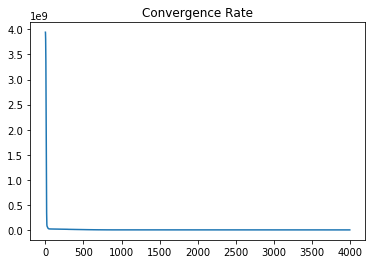

In [45]:
plt.title('Convergence Rate')
plt.plot(fitting_amff.history['loss'])
plt.show()

#### Saving Model

In [46]:
# customizeAnn = ann_model_for_evaluation.customize() 
# customizeAnn.save_weights('./Trained_Models/Saved_model_for_Future_1')

#### Loadin Model

In [47]:
# ann_model_for_evaluation = ann_model_for_evaluation.customize()
# ann_model_for_evaluation.load_weights('./Trained_Models/Sigmoid+Relu+200_KernelRegularize_3Outputs_1E-1LearnRate_OtherDefaults')

#### Evaluating model on training data (whole data this time)

In [48]:
ann_future_model_prediction_on_training = ann_model_for_future.predict(input_data_tf)

#### Generting Future Data and Predicting Future Cases

In [49]:
future_data, scaled_future_data, future_dates = generate_future_data(input_data[:,1], 7)
all_cases_future = ann_model_for_future.predict(scaled_future_data)

#### Evaluating metrics of trained ANN

In [50]:
ann_model_for_future_customize = ann_model_for_future.customize()
ann_model_for_future_customize.evaluate(input_data_tf, output_data_tf)

137/137 [==============================] - 0s 1ms/sample - loss: 686156.7619 - MeanAbsoluteError: 342.7319


[686156.7619468522, 342.73193]

#### Dataframe of predicted cases on future data by proposed ANN

In [51]:
pd.DataFrame(all_cases_future, index = future_dates, columns = ['Confirmed', 'Deaths', 'Recoveries'])

,Confirmed,Deaths,Recoveries
10/07/20,248657.734375,5047.910645,155059.906250
11/07/20,255262.781250,5195.098633,161362.843750
12/07/20,262402.843750,5361.798828,167964.781250
13/07/20,269810.906250,5546.515137,174755.140625
14/07/20,277498.000000,5751.019043,181739.468750
15/07/20,285216.968750,5959.357422,188909.015625
16/07/20,292983.656250,6172.032715,196266.890625
17/07/20,300956.406250,6393.086914,203807.640625


#### Plotting Graphs

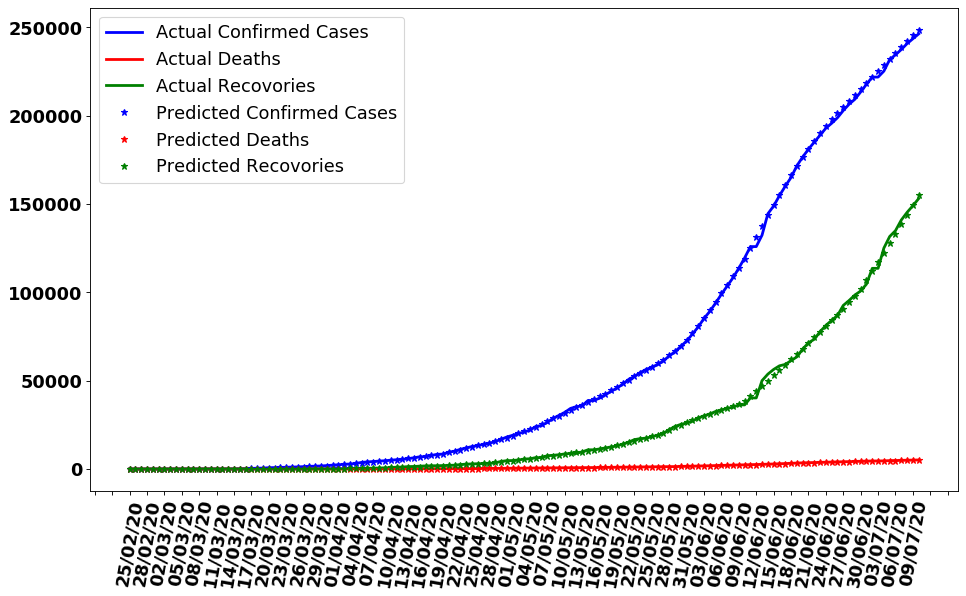

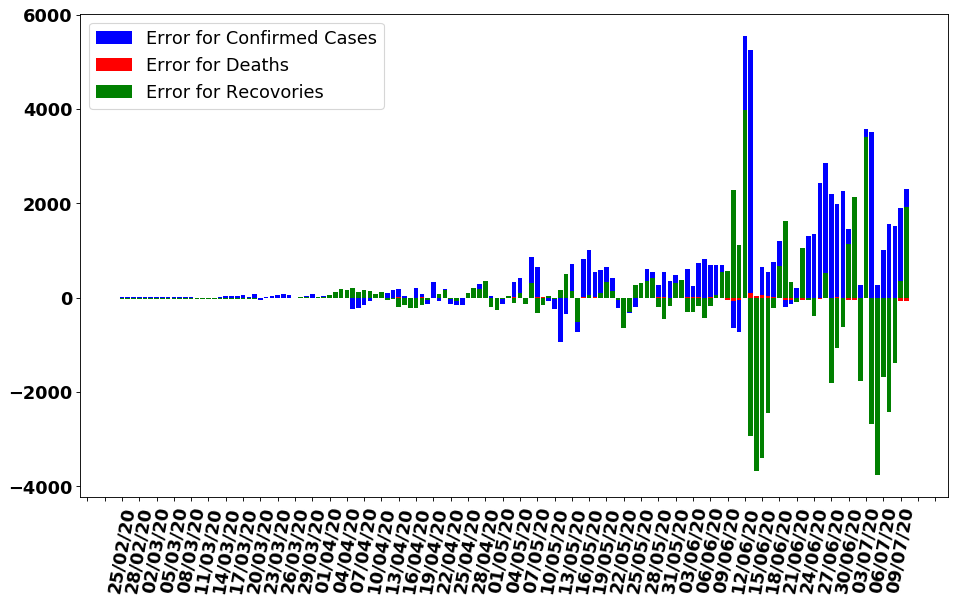

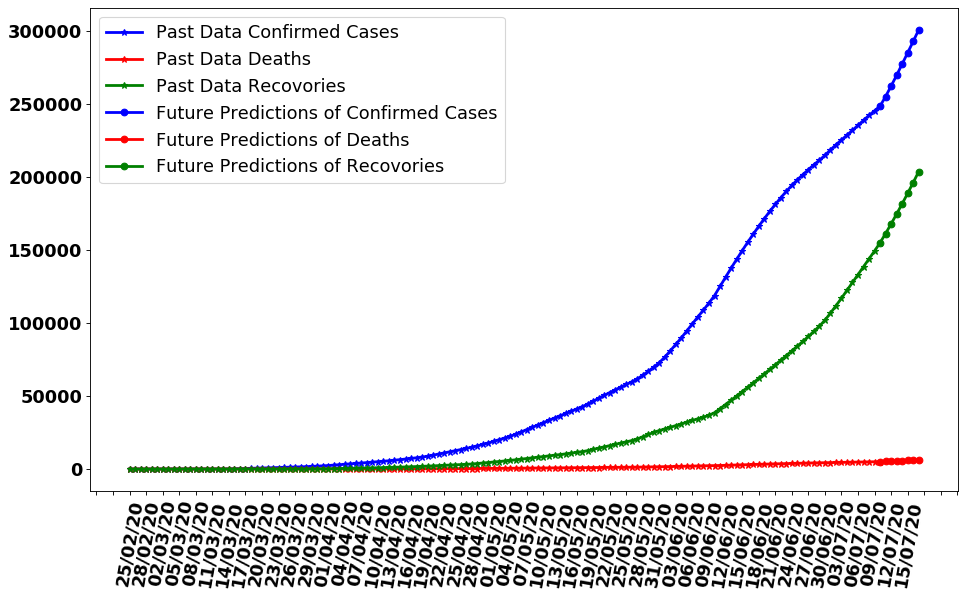

In [52]:
# plt.subplot(322).set_title("Error Graph for Confirmed Cases")

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, output_data_tf[:,0], 'b', output_data_tf[:,1], 'r', output_data_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '*b', 
         ann_future_model_prediction_on_training[:,1], '*r', 
         ann_future_model_prediction_on_training[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates,(ann_future_model_prediction_on_training[:,0].reshape(-1,) - output_data_tf[:,0]), color = 'b')
plt.bar(dates,(ann_future_model_prediction_on_training[:,1].reshape(-1,) - output_data_tf[:,1]), color = 'r')
plt.bar(dates,(ann_future_model_prediction_on_training[:,2].reshape(-1,) - output_data_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()


figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '-*b', 
         ann_future_model_prediction_on_training[:,1], '-*r', 
         ann_future_model_prediction_on_training[:,2], '-*g',
         future_dates, all_cases_future[:,0], '-ob', 
         future_dates, all_cases_future[:,1], '-or', 
         future_dates, all_cases_future[:,2], '-og', 
         linewidth = 2.5)
plt.legend(['Past Data Confirmed Cases', 'Past Data Deaths','Past Data Recovories', 'Future Predictions of Confirmed Cases', 
            'Future Predictions of Deaths','Future Predictions of Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()
